# **OPEN UNIVERSITY LEARNING ANALYTICS DATASET ANALYSIS**

The Open University Learning Analytics Dataset (OULAD) contains anonymized data on students enrolled in online courses offered by the Open University. The dataset is composed of multiple interconnected tables that capture student demographics, academic performance, course structure, and online learning behavior. It includes information such as student registration and withdrawal dates, assessment details and scores, final results, prior educational background, and interaction logs from the Virtual Learning Environment (VLE). Together, these components provide a comprehensive view of student engagement and progression throughout online modules, enabling analysis of learning behavior, performance patterns, and factors influencing student success and withdrawal.

# DATA LOADING AND INITIAL SETUP



In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets
studentregistration = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentRegistration.csv')
studentinfo = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentInfo.csv')
studentvle = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentVle.csv')
studentassessment = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/studentAssessment.csv')
courses = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/courses.csv')
vle = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/vle.csv')
assessments = pd.read_csv('/content/drive/MyDrive/OULA_Dataset/assessments.csv')

# INITIAL DATA INSPECTION & DATA UNDERSTANDING

In [ ]:
print("studentRegistration Columns:")
print(studentregistration.columns.tolist(), "\n")

print("studentInfo Columns:")
print(studentinfo.columns.tolist(), "\n")

print("studentVle Columns:")
print(studentvle.columns.tolist(), "\n")

print("studentAssessment Columns:")
print(studentassessment.columns.tolist(), "\n")

print("courses Columns:")
print(courses.columns.tolist(), "\n")

print("vle columns:")
print(vle.columns.tolist(), "\n")

print("assessments columns:")
print(assessments.columns.tolist())

studentRegistration Columns:
['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration'] 

studentInfo Columns:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result'] 

studentVle Columns:
['code_module', 'code_presentation', 'id_student', 'id_site', 'date', 'sum_click'] 

studentAssessment Columns:
['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'] 

courses Columns:
['code_module', 'code_presentation', 'module_presentation_length'] 

vle columns:
['id_site', 'code_module', 'code_presentation', 'activity_type', 'week_from', 'week_to'] 

assessments columns:
['code_module', 'code_presentation', 'id_assessment', 'assessment_type', 'date', 'weight']


In [ ]:
studentregistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
studentregistration.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [ ]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
studentinfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [ ]:
studentvle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
studentvle.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [ ]:
studentassessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [ ]:
studentassessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


In [ ]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [ ]:
courses.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [ ]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [ ]:
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [ ]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


# DATA PREPARATION & HANDLING MISSING VALUES


In [ ]:
print("studentregistration:", studentregistration.shape)
print("studentinfo:", studentinfo.shape)
print("studentvle:", studentvle.shape)
print("studentassessment:", studentassessment.shape)
print("courses:", courses.shape)
print("vle:", vle.shape)
print("assessments:", assessments.shape)

studentregistration: (32593, 5)
studentinfo: (32593, 12)
studentvle: (10655280, 6)
studentassessment: (173912, 5)
courses: (22, 3)
vle: (6364, 6)
assessments: (206, 6)


In [ ]:
# Check Missing Values
check_null_df = {
    "studentinfo": studentinfo,
    "studentregistration": studentregistration,
    "studentassessment": studentassessment,
    "studentvle": studentvle,
    "assessments": assessments,
    "vle": vle,
    "courses": courses
}

for name, df in check_null_df.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in studentinfo:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Missing values in studentregistration:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Missing values in studentassessment:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Missing values in studentvle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Missing values in assessments:
code_module           0
code_prese

In [ ]:
# Handle Missing Values
studentinfo['imd_band'] = studentinfo['imd_band'].fillna(studentinfo['imd_band'].mode()[0])
studentregistration['date_registration'] = studentregistration['date_registration'].fillna(studentregistration['date_registration'].median())
studentregistration['date_unregistration'] = studentregistration['date_unregistration'].fillna(-1)
studentassessment['score'] = studentassessment['score'].fillna(0)
assessments['date'] = assessments['date'].fillna(assessments['date'].median())
vle['week_from'] = vle['week_from'].fillna(-1)
vle['week_to'] = vle['week_to'].fillna(-1)

In [ ]:
# Verify Missing Values After Cleaning
for name, df in check_null_df.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in student_info:
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Missing values in student_reg:
code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

Missing values in student_assess:
id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

Missing values in student_vle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Missing values in assessments:
code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date             

# MERGE 'studentregistration' and 'studentinfo' TABLES

In [ ]:
# Integrate registration details with student demographic and performance data to create a unified student-level dataset
data = pd.merge(studentregistration, studentinfo, on=['id_student', 'code_module', 'code_presentation'], how='left')

In [ ]:
data.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,-1.0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,-1.0,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,-1.0,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,-1.0,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [ ]:
data.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,-4.0,-1.0,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,-23.0,-1.0,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,-129.0,-1.0,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,-49.0,101.0,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,-28.0,-1.0,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [ ]:
assessment_agg = studentassessment.groupby('id_student').agg(
    total_score=('score', 'sum'),
    avg_score=('score', 'mean'),
    num_assessments=('score', 'count')
).reset_index()

In [ ]:
assessment_agg.head()

,id_student,total_score,avg_score,num_assessments
0,6516,309.0,61.800000,5
1,8462,609.0,87.000000,7
2,11391,410.0,82.000000,5
3,23629,330.0,82.500000,4
4,23698,670.0,74.444444,9


In [ ]:
studentvle_agg = studentvle.groupby('id_student').agg(
    total_clicks=('sum_click', 'sum')
).reset_index()

In [ ]:
studentvle_agg.head()

,id_student,total_clicks
0,6516,2791
1,8462,656
2,11391,934
3,23629,161
4,23698,910


In [ ]:
assessment_features = (
    studentassessment
    .groupby("id_student")
    .agg(
        total_score=("score", "sum"),
        avg_score=("score", "mean"),
        num_assessments=("id_assessment", "count")
    )
    .reset_index()
)

In [ ]:
vle_features = (
    studentvle
    .groupby("id_student")
    .agg(
        total_clicks=("sum_click", "sum")
    )
    .reset_index()
)

In [ ]:
studentinfo = studentinfo.merge(assessment_features, on="id_student", how="left")

studentinfo = studentinfo.merge(vle_features, on="id_student", how="left")

studentinfo['total_score'] = studentinfo['total_score'].fillna(0)
studentinfo['avg_score'] = studentinfo['avg_score'].fillna(0)
studentinfo['num_assessments'] = studentinfo['num_assessments'].fillna(0)
studentinfo['total_clicks'] = studentinfo['total_clicks'].fillna(0)

In [ ]:
studentinfo['target_pass'] = studentinfo['final_result'].map({
    'Pass': 1,
    'Distinction': 1,
    'Fail': 0,
    'Withdrawn': 0
})

studentinfo[['final_result', 'target_pass']].head(20)

,final_result,target_pass
0,Pass,1
1,Pass,1
2,Withdrawn,0
3,Pass,1
4,Pass,1
5,Pass,1
6,Pass,1
7,Pass,1
8,Pass,1
9,Pass,1


In [ ]:
studentinfo = studentinfo.merge(
    studentregistration,
    on=["code_module", "code_presentation", "id_student"],
    how="left"
)

In [ ]:
studentinfo.shape

(32593, 19)

In [ ]:
print(studentinfo.columns)

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'total_score',
       'avg_score', 'num_assessments', 'total_clicks', 'target_pass',
       'date_registration', 'date_unregistration'],
      dtype='object')


In [ ]:
df = studentinfo.copy()

## Summary of 'DATA PREPARATION & HANDLING MISSING VALUES'

In this section, we focused on cleaning and preparing the dataset for analysis. The key steps included:

1.  **Initial Inspection**: We first examined the dimensions (number of rows and columns) of all seven dataframes: `studentregistration`, `studentinfo`, `studentvle`, `studentassessment`, `courses`, `vle`, and `assessments`.

2.  **Missing Value Identification**: A comprehensive check was performed across all dataframes to identify columns containing missing values.

3.  **Missing Value Handling**:
    *   `studentinfo`: Missing values in the `imd_band` column were imputed using the mode (the most frequent value) to preserve the distribution.
    *   `studentregistration`: Missing `date_registration` values were filled with the median date, and `date_unregistration` missing values were replaced with `-1` to explicitly denote students who did not unregister.
    *   `studentassessment`: Any missing `score` values were set to `0`, assuming unrecorded scores equate to zero performance.
    *   `assessments`: Missing `date` values were filled with the median date for consistency.
    *   `vle`: `week_from` and `week_to` missing values were replaced with `-1` to indicate an undefined period.

# **EXPLORATORY DATA ANALYSIS**

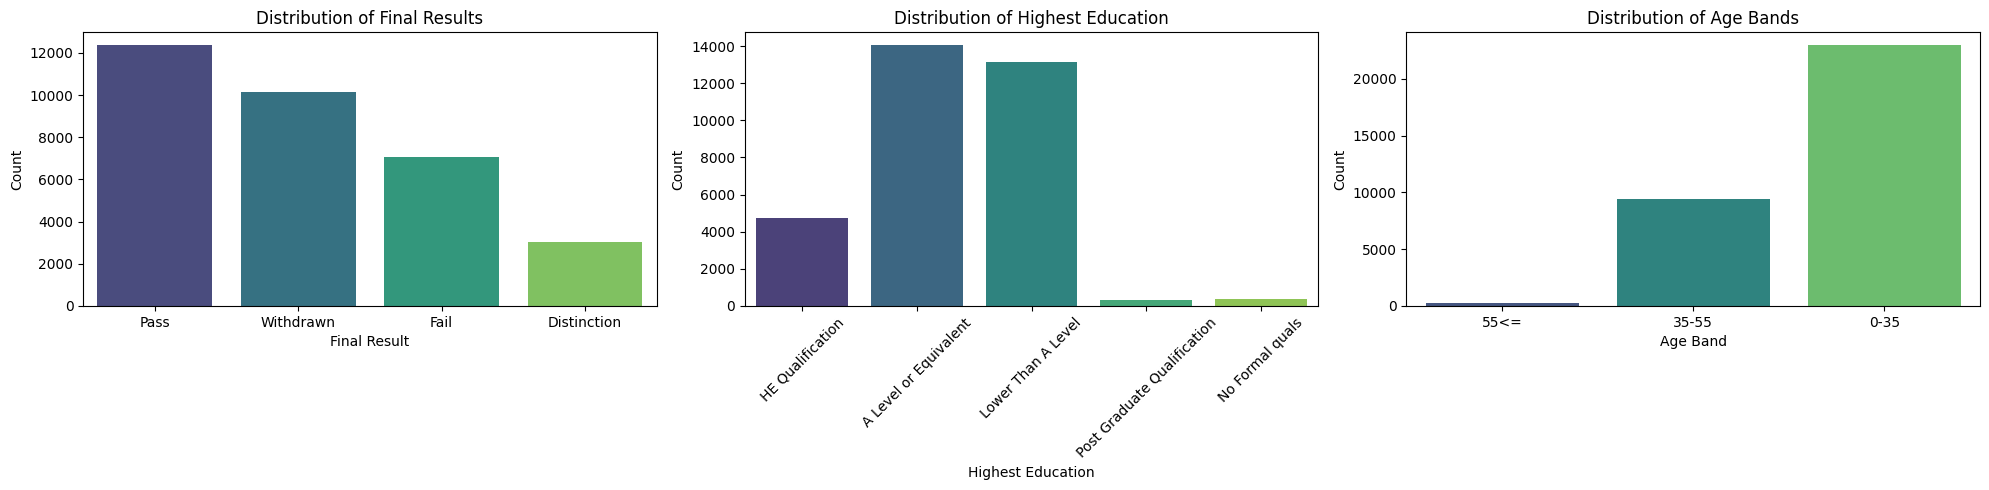

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for final_result
sns.countplot(data=studentinfo, x='final_result', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Final Results')
axes[0].set_xlabel('Final Result')
axes[0].set_ylabel('Count')

# Plot for highest_education
sns.countplot(data=studentinfo, x='highest_education', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Highest Education')
axes[1].set_xlabel('Highest Education')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Plot for age_band
sns.countplot(data=studentinfo, x='age_band', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Age Bands')
axes[2].set_xlabel('Age Band')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

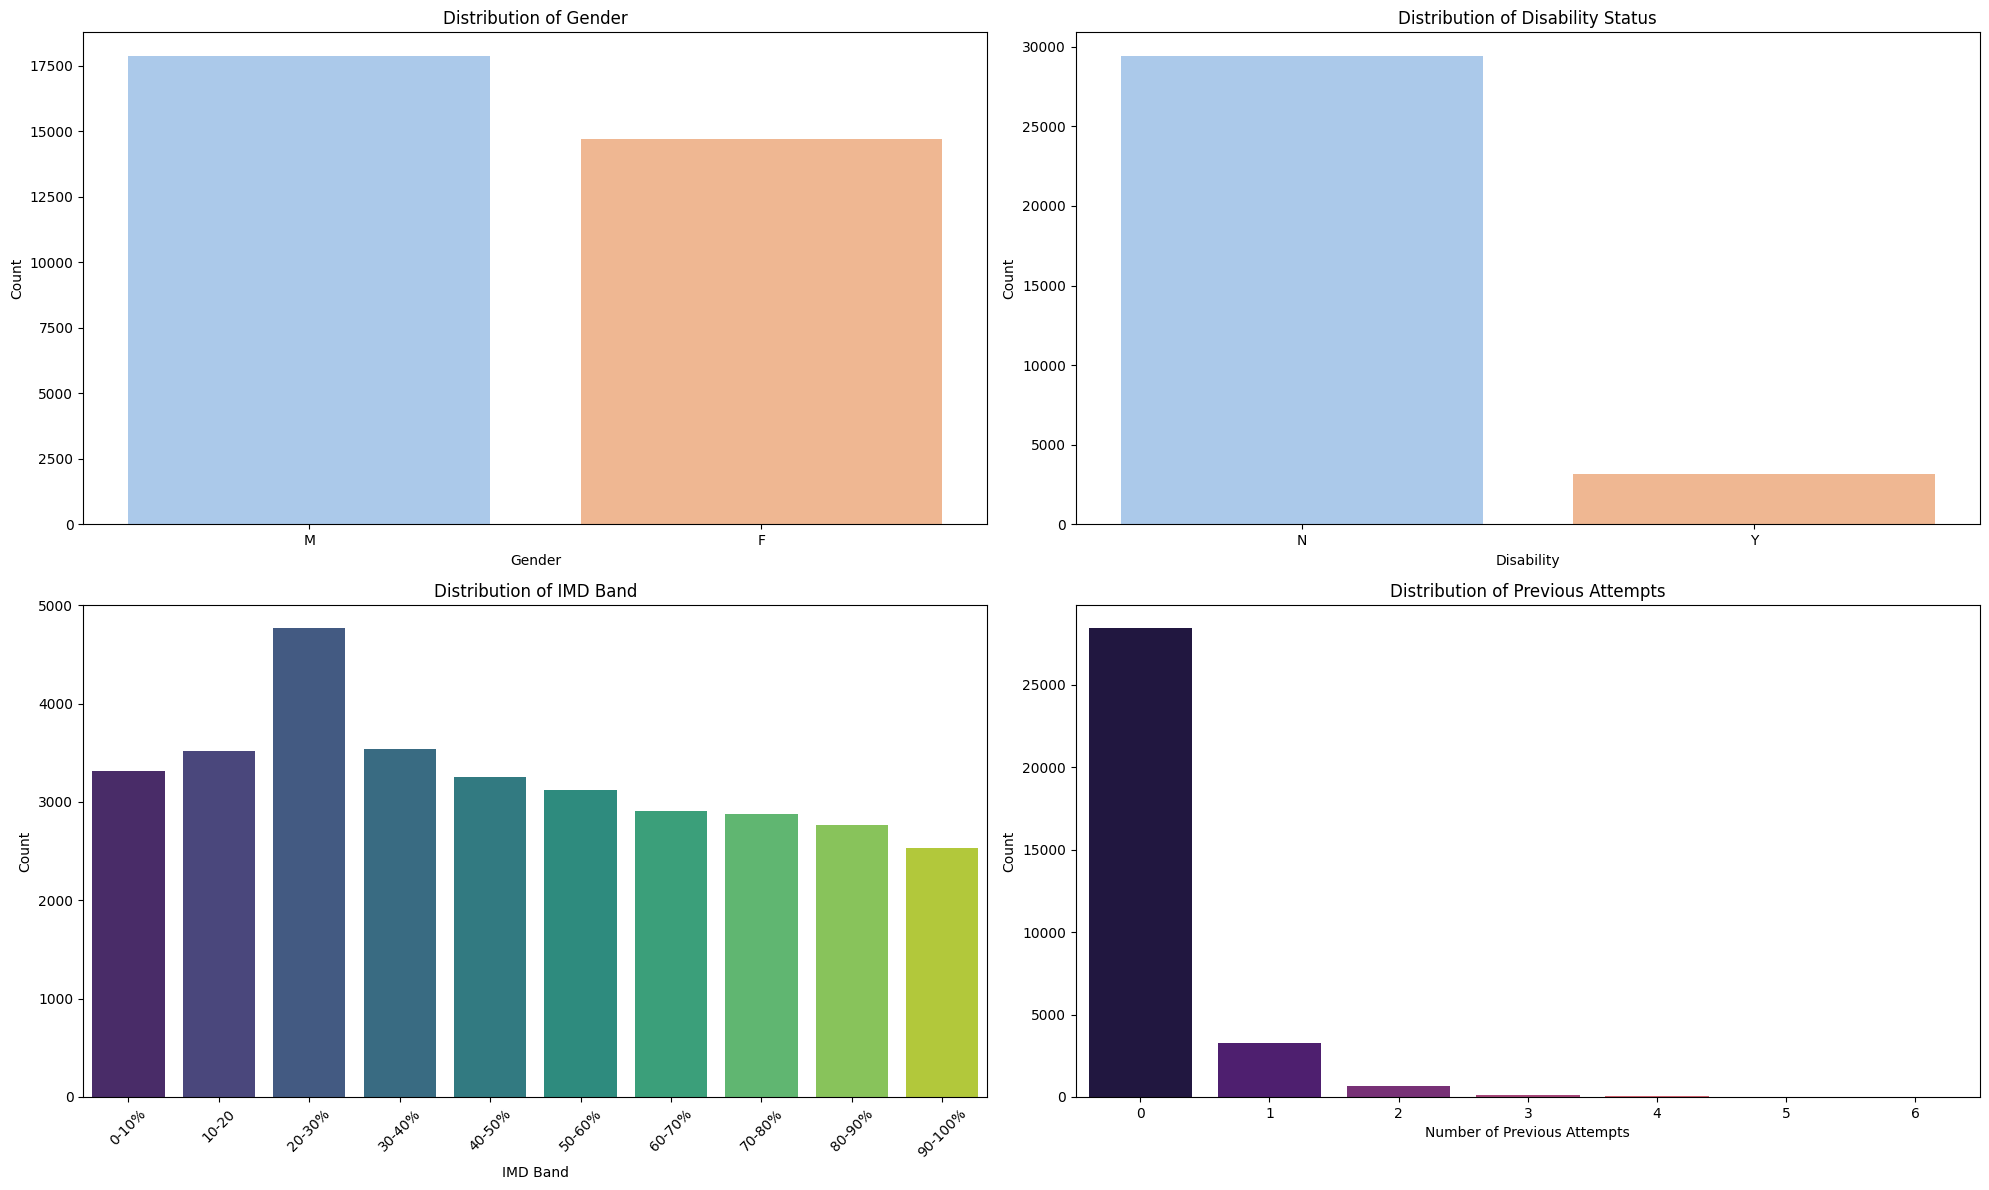

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot for gender
sns.countplot(data=studentinfo, x='gender', ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribution of Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# Plot for disability
sns.countplot(data=studentinfo, x='disability', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution of Disability Status')
axes[0, 1].set_xlabel('Disability')
axes[0, 1].set_ylabel('Count')

# Plot for imd_band
# Sorting imd_band to display in logical order
imd_order = sorted(studentinfo['imd_band'].unique().astype(str))
sns.countplot(data=studentinfo, x='imd_band', ax=axes[1, 0], palette='viridis', order=imd_order)
axes[1, 0].set_title('Distribution of IMD Band')
axes[1, 0].set_xlabel('IMD Band')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for num_of_prev_attempts
sns.countplot(data=studentinfo, x='num_of_prev_attempts', ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Distribution of Previous Attempts')
axes[1, 1].set_xlabel('Number of Previous Attempts')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

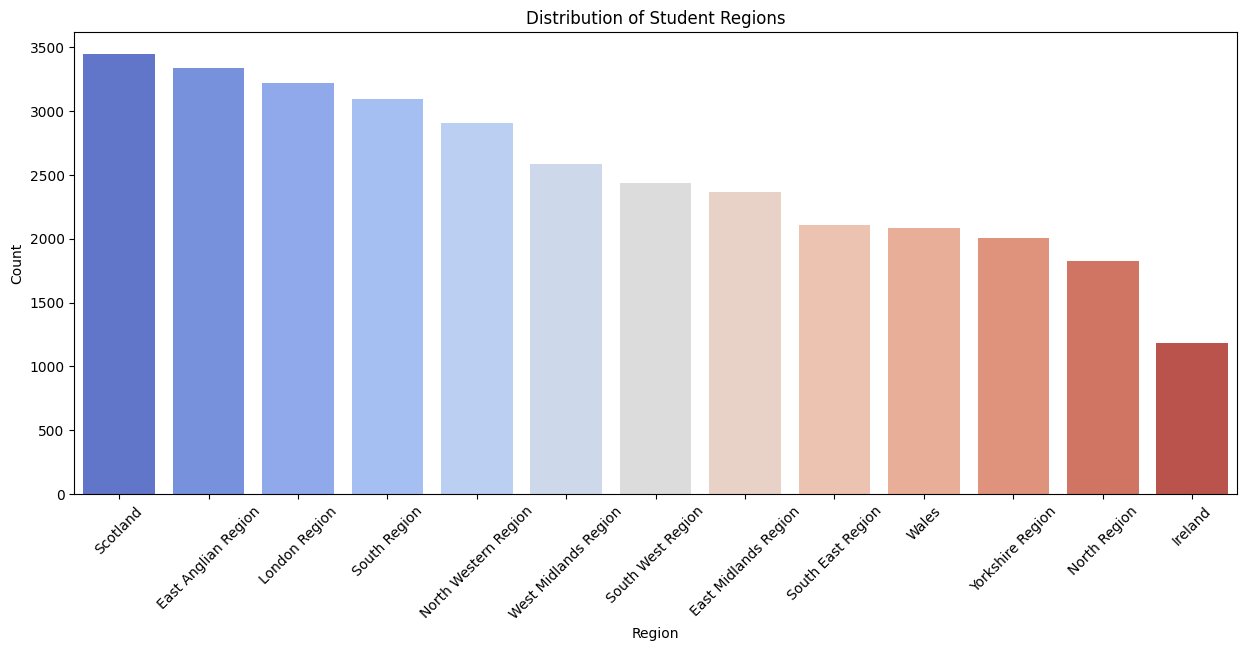

In [ ]:
# Plot for Region separately due to many categories
plt.figure(figsize=(15, 6))
sns.countplot(data=studentinfo, x='region', palette='coolwarm', order=studentinfo['region'].value_counts().index)
plt.title('Distribution of Student Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

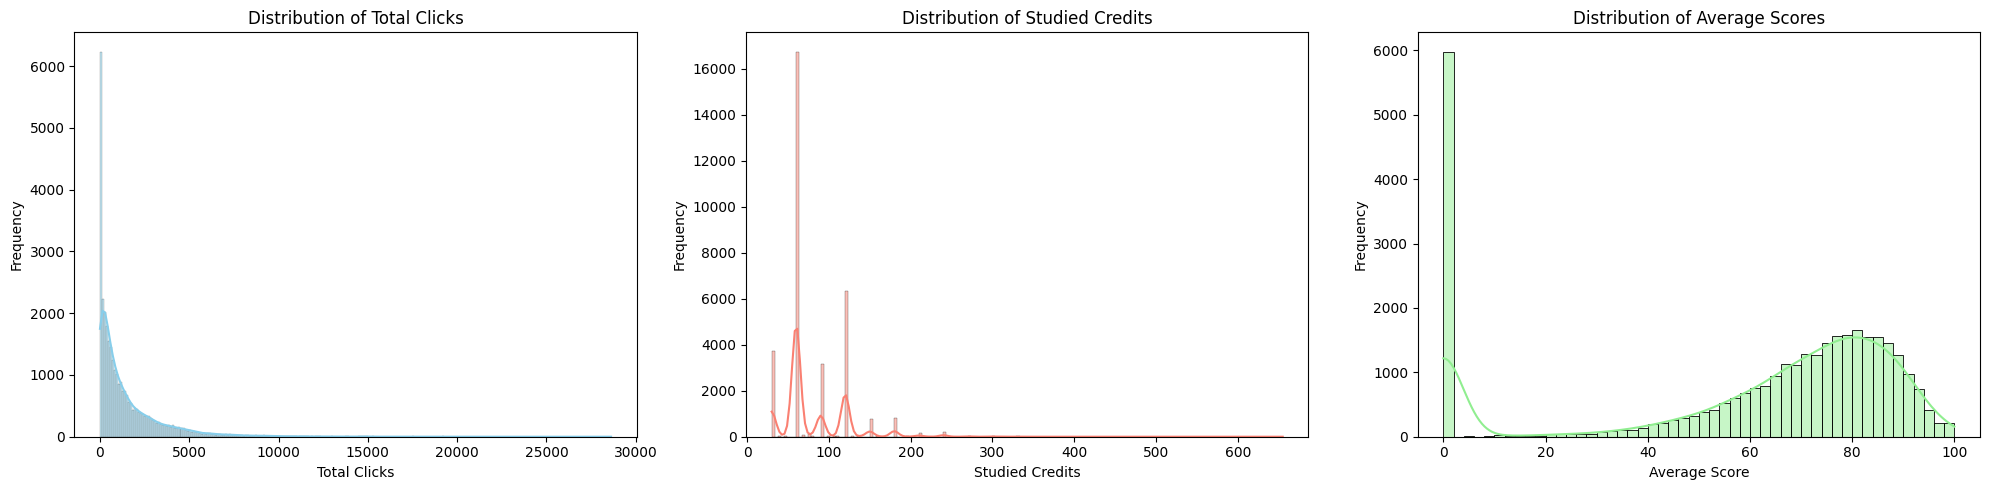

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot for total_clicks
sns.histplot(data=studentinfo, x='total_clicks', kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Total Clicks')
axes[0].set_xlabel('Total Clicks')
axes[0].set_ylabel('Frequency')

# Plot for studied_credits
sns.histplot(data=studentinfo, x='studied_credits', kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Studied Credits')
axes[1].set_xlabel('Studied Credits')
axes[1].set_ylabel('Frequency')

# Plot for avg_score
sns.histplot(data=studentinfo, x='avg_score', kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribution of Average Scores')
axes[2].set_xlabel('Average Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

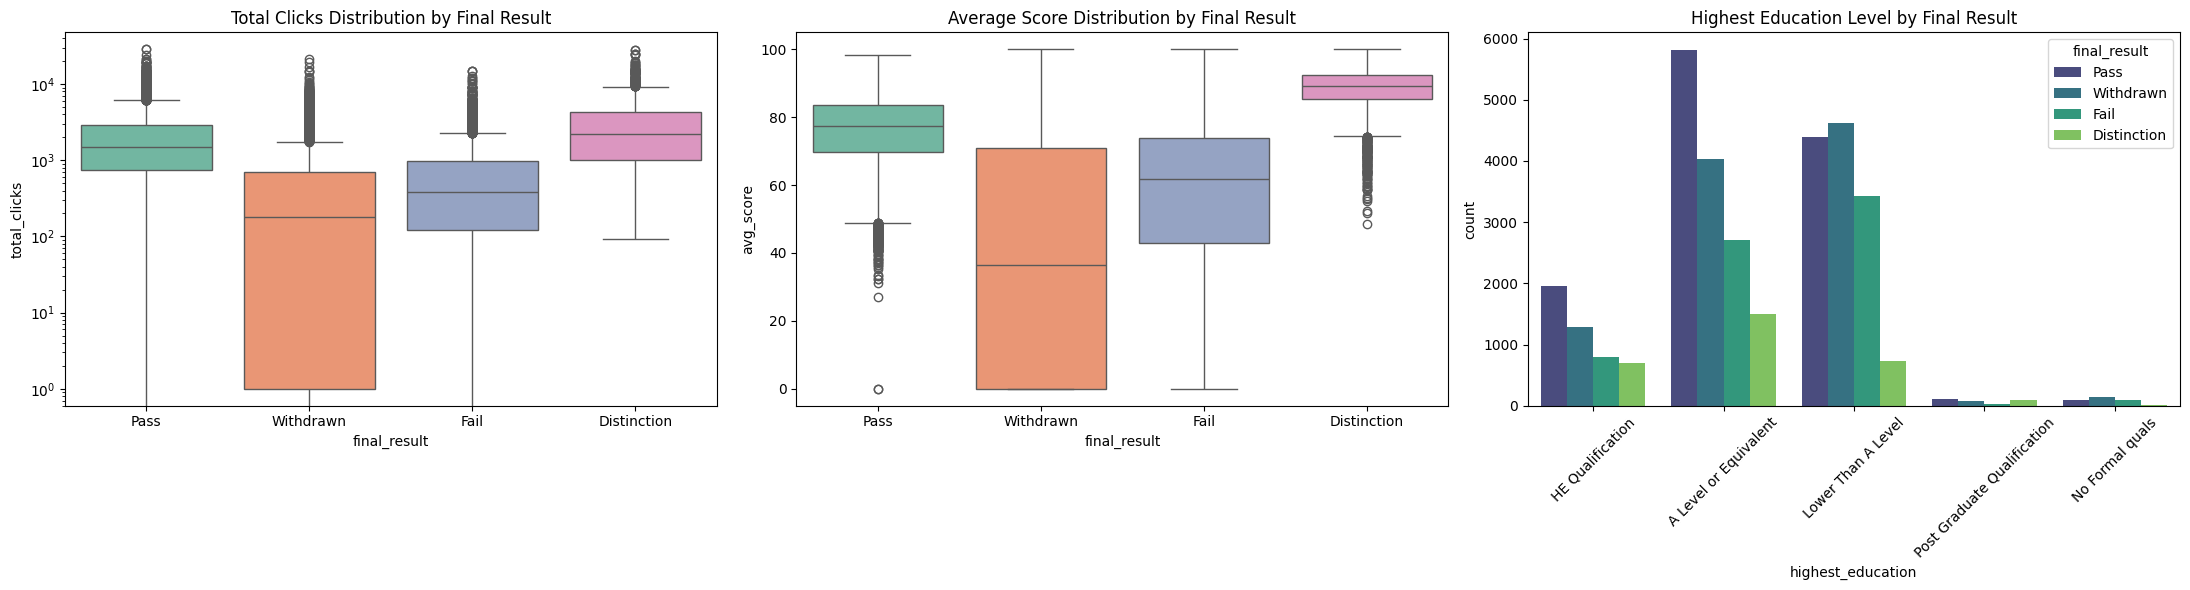


Cross-tabulation of Highest Education and Final Result (Normalized by Row):
final_result                 Distinction      Fail      Pass  Withdrawn
highest_education                                                      
A Level or Equivalent           0.106515  0.192738  0.413813   0.286935
HE Qualification                0.147357  0.167019  0.414376   0.271247
Lower Than A Level              0.055252  0.260374  0.333257   0.351117
No Formal quals                 0.046110  0.273775  0.250720   0.429395
Post Graduate Qualification     0.281150  0.108626  0.373802   0.236422


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# 1. Box plot of total_clicks by final_result
sns.boxplot(data=studentinfo, x='final_result', y='total_clicks', ax=axes[0], palette='Set2')
axes[0].set_title('Total Clicks Distribution by Final Result')
axes[0].set_yscale('log') # Log scale might be useful for clicks if skewed, but standard boxplot is requested. I'll stick to standard or add log if needed. Given usually skewed nature, log helps but let's stick to raw unless specified.
# Actually, let's keep it linear as per standard request, but maybe limit y if outliers are huge? No, boxplot handles outliers.

# 2. Box plot of avg_score by final_result
sns.boxplot(data=studentinfo, x='final_result', y='avg_score', ax=axes[1], palette='Set2')
axes[1].set_title('Average Score Distribution by Final Result')

# 3. Count plot of highest_education with final_result hue
sns.countplot(data=studentinfo, x='highest_education', hue='final_result', ax=axes[2], palette='viridis')
axes[2].set_title('Highest Education Level by Final Result')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Cross-tabulation
edu_result_ct = pd.crosstab(studentinfo['highest_education'], studentinfo['final_result'], normalize='index')
print("\nCross-tabulation of Highest Education and Final Result (Normalized by Row):")
print(edu_result_ct)

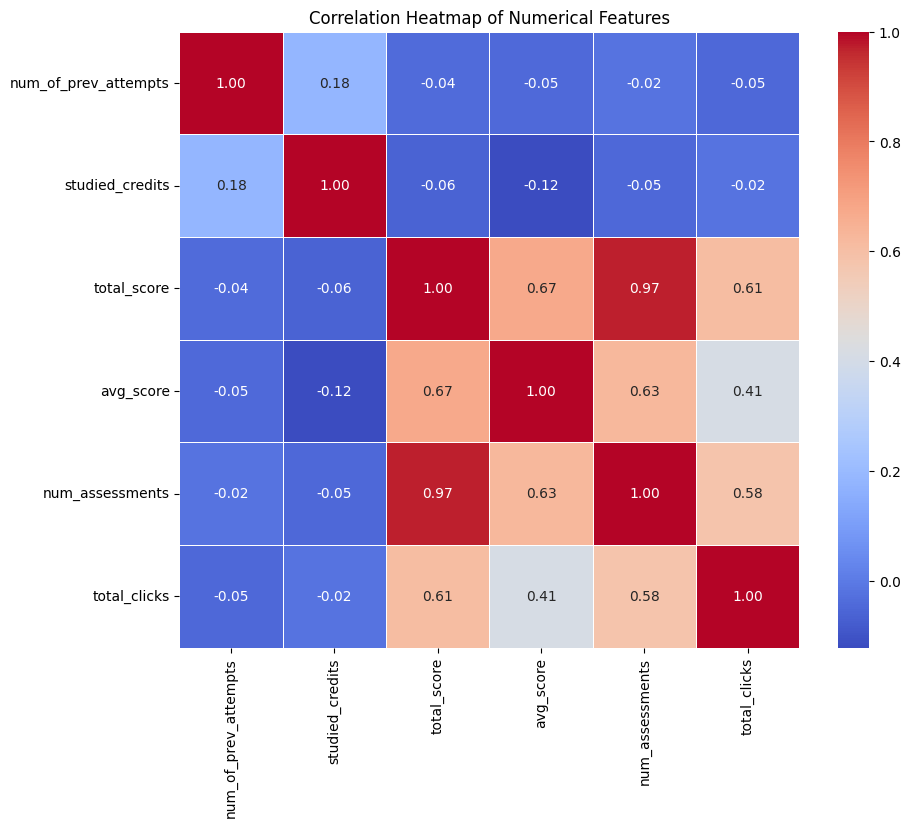

In [ ]:
numerical_cols = ['num_of_prev_attempts', 'studied_credits', 'total_score', 'avg_score', 'num_assessments', 'total_clicks']

corr_matrix = studentinfo[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

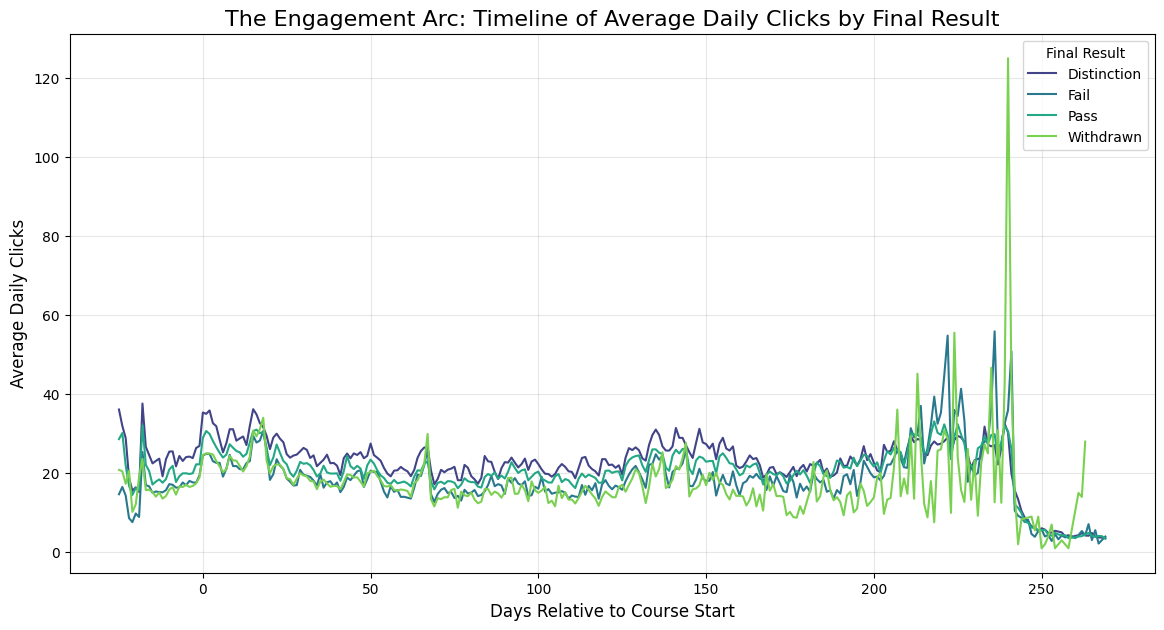

In [ ]:
# 1. Aggregate studentvle to calculate total clicks per student per day
daily_student_clicks = studentvle.groupby(['code_module', 'code_presentation', 'id_student', 'date'], as_index=False)['sum_click'].sum()

# 2. Merge with studentinfo to get final_result
# We use a subset of studentinfo to avoid duplicate columns or unnecessary data
merged_clicks = daily_student_clicks.merge(
    studentinfo[['code_module', 'code_presentation', 'id_student', 'final_result']],
    on=['code_module', 'code_presentation', 'id_student'],
    how='inner'
)

# 3. Calculate average daily clicks for each final_result group
engagement_arc = merged_clicks.groupby(['final_result', 'date'], as_index=False)['sum_click'].mean()

# 4. Create the visualization
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=engagement_arc,
    x='date',
    y='sum_click',
    hue='final_result',
    palette='viridis'
)

plt.title('The Engagement Arc: Timeline of Average Daily Clicks by Final Result', fontsize=16)
plt.xlabel('Days Relative to Course Start', fontsize=12)
plt.ylabel('Average Daily Clicks', fontsize=12)
plt.legend(title='Final Result')
plt.grid(True, alpha=0.3)
plt.show()

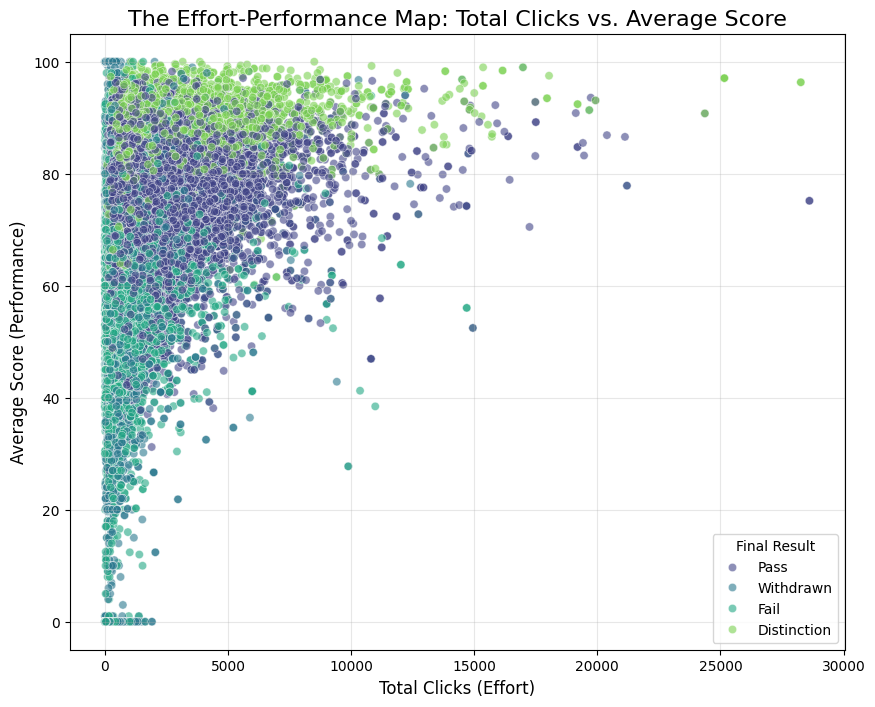

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=studentinfo,
    x='total_clicks',
    y='avg_score',
    hue='final_result',
    palette='viridis',
    alpha=0.6
)

plt.title('The Effort-Performance Map: Total Clicks vs. Average Score', fontsize=16)
plt.xlabel('Total Clicks (Effort)', fontsize=12)
plt.ylabel('Average Score (Performance)', fontsize=12)
plt.legend(title='Final Result')
plt.grid(True, alpha=0.3)
plt.show()

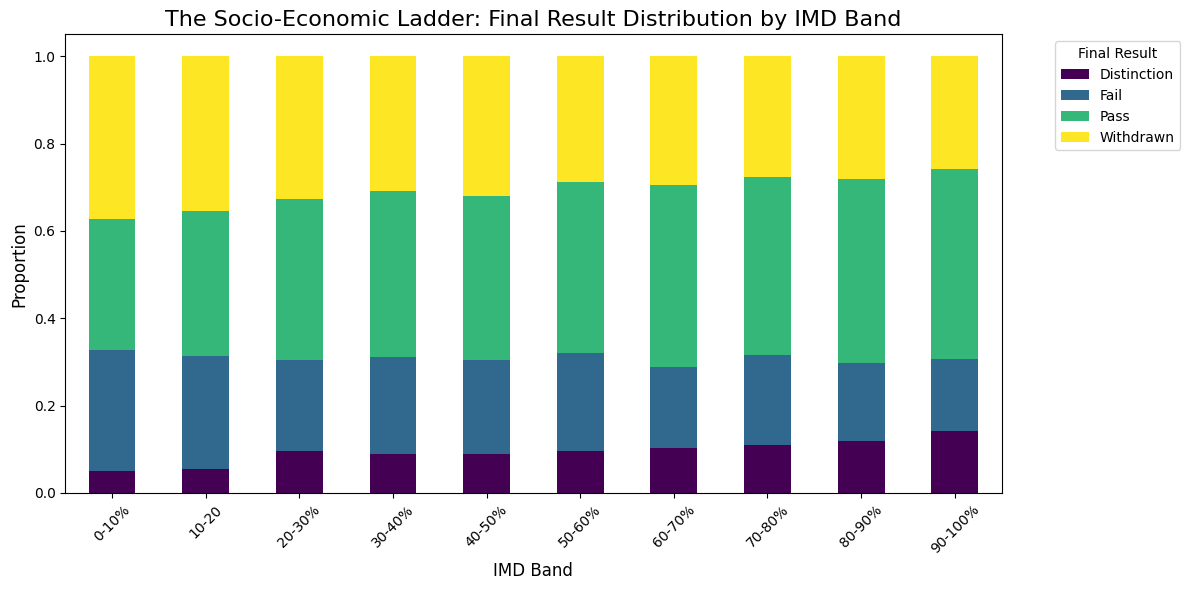

In [ ]:
imd_order = ['0-10%', '10-20', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Create cross-tabulation normalized by index
imd_result_ct = pd.crosstab(studentinfo['imd_band'], studentinfo['final_result'], normalize='index')

# Reindex to ensure correct order
imd_result_ct = imd_result_ct.reindex(imd_order)

# Plot stacked bar chart
ax = imd_result_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('The Socio-Economic Ladder: Final Result Distribution by IMD Band', fontsize=16)
plt.xlabel('IMD Band', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Final Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

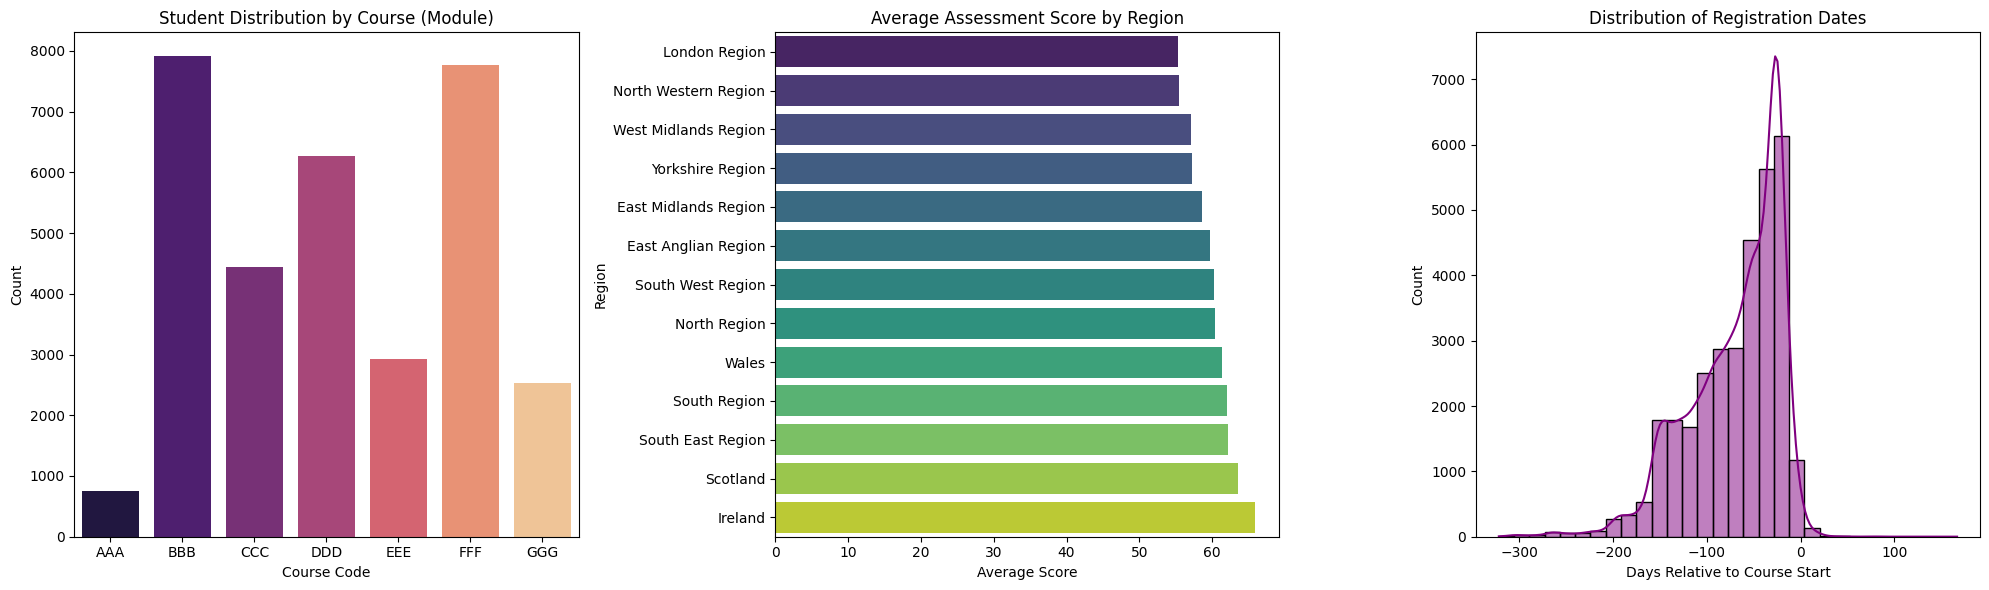

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Count Plot: Code Module (Courses) - REPLACING Final Result Pie Chart
sns.countplot(data=studentinfo, x='code_module', ax=axes[0], palette='magma', order=sorted(studentinfo['code_module'].unique()))
axes[0].set_title('Student Distribution by Course (Module)')
axes[0].set_xlabel('Course Code')
axes[0].set_ylabel('Count')

# 2. Bar Chart: Average Score by Region (Keeping this, as it's new info)
region_scores = studentinfo.groupby('region')['avg_score'].mean().sort_values()
sns.barplot(x=region_scores.values, y=region_scores.index, ax=axes[1], palette='viridis')
axes[1].set_title('Average Assessment Score by Region')
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Region')

# 3. Histogram: Date of Registration (Keeping this, as it's new info)
# (Negative values mean days BEFORE the course starts)
sns.histplot(studentinfo['date_registration'], kde=True, ax=axes[2], color='purple', bins=30)
axes[2].set_title('Distribution of Registration Dates')
axes[2].set_xlabel('Days Relative to Course Start')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

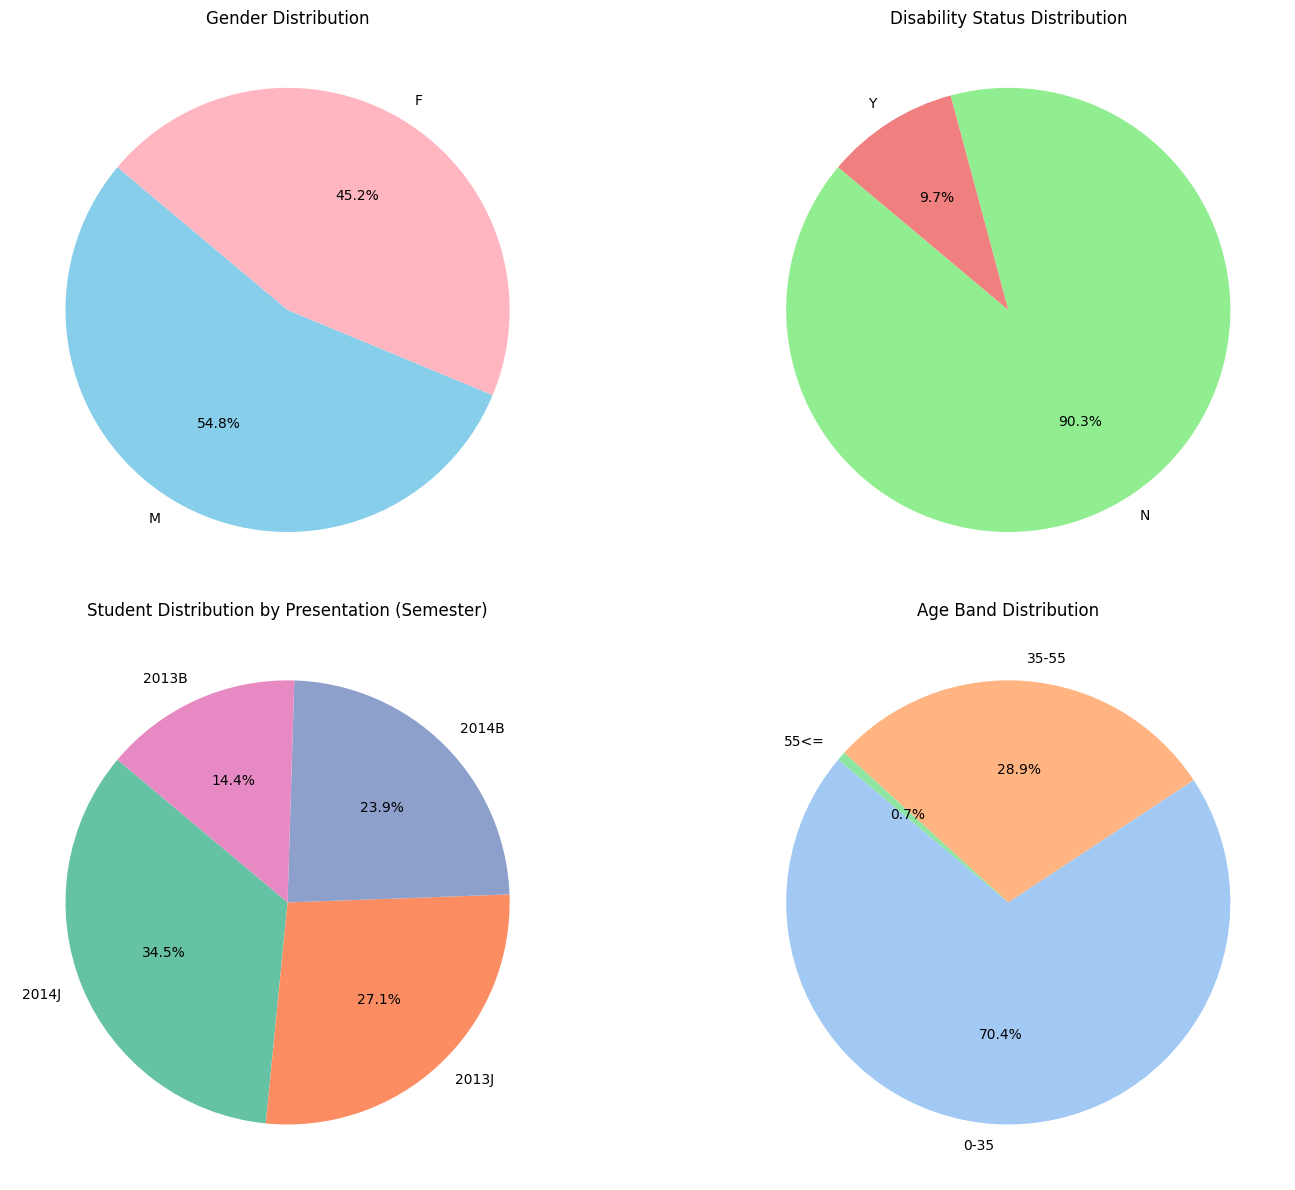

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie Chart: Gender Distribution
gender_counts = studentinfo['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightpink'])
axes[0, 0].set_title('Gender Distribution')

# 2. Pie Chart: Disability Status Distribution
disability_counts = studentinfo['disability'].value_counts()
axes[0, 1].pie(disability_counts, labels=disability_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Disability Status Distribution')

# 3. Pie Chart: Code Presentation (Semester) Distribution
presentation_counts = studentinfo['code_presentation'].value_counts()
axes[1, 0].pie(presentation_counts, labels=presentation_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
axes[1, 0].set_title('Student Distribution by Presentation (Semester)')

# 4. Pie Chart: Age Band Distribution
age_counts = studentinfo['age_band'].value_counts()
axes[1, 1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1, 1].set_title('Age Band Distribution')

plt.tight_layout()
plt.show()

## Summary of 'EXPLORATORY DATA ANALYSIS'

In the **EXPLORATORY DATA ANALYSIS (EDA)** section, we delved into understanding the distributions, relationships, and patterns within our prepared dataset. The primary activities included:

1.  **Distributional Analysis of Categorical Variables**:
    *   We used `countplot` visualizations to examine the distribution of `final_result`, `highest_education`, `age_band`, `gender`, `disability`, `imd_band`, `num_of_prev_attempts`, and `code_module`.
    *   Pie charts were used to illustrate the proportions of `gender`, `disability`, `code_presentation`, and `age_band`.
    *   A dedicated `countplot` explored the distribution of students across different `region`s.

2.  **Distributional Analysis of Numerical Variables**:
    *   Histograms with KDE (Kernel Density Estimate) were generated for `total_clicks`, `studied_credits`, `avg_score`, and `date_registration` to understand their frequency and shape.

3.  **Relationships between Variables**:
    *   **Final Result vs. Other Features**: We used box plots to analyze the distribution of `total_clicks` and `avg_score` across different `final_result` categories, and count plots to show `highest_education` distribution by `final_result`.
    *   **Cross-tabulations**: Normalized cross-tabulations were performed between `highest_education` and `final_result`, and `imd_band` and `final_result` to reveal conditional probabilities and proportions.
    *   **Correlation Heatmap**: A correlation heatmap was generated for key numerical features (`num_of_prev_attempts`, `studied_credits`, `total_score`, `avg_score`, `num_assessments`, `total_clicks`) to identify linear relationships.

4.  **Specialized Visualizations for Engagement and Socio-Economic Impact**:
    *   **The Engagement Arc**: A line plot visualized the trend of average daily clicks over time, segmented by `final_result`, to understand student engagement patterns.
    *   **The Effort-Performance Map**: A scatter plot depicted the relationship between `total_clicks` and `avg_score`, colored by `final_result`, offering insights into the effort-performance dynamic.
    *   **The Socio-Economic Ladder**: A stacked bar chart showed the distribution of `final_result` across different `imd_band`s, highlighting the impact of socio-economic status.

5.  **Course and Registration Analysis**:
    *   We explored the average assessment scores by `region` using a bar chart.
    *   A histogram showed the distribution of `date_registration` (days relative to course start) to understand registration timing patterns.

# FEATURE ENGINEERING

In [ ]:
df['days_before_start'] = df['date_registration'].apply(lambda x: -x)

df['has_withdrawn'] = (df['date_unregistration'] != -1).astype(int)

df['days_until_withdrawal'] = df.apply(
    lambda r: (r['date_unregistration'] - r['date_registration']) if r['date_unregistration'] != -1 else -1,
    axis=1
)

In [ ]:
def imd_to_mid(s):
    try:
        if pd.isna(s) or s == 'Unknown':
            return np.nan
        s2 = s.replace('%','')
        if '<=' in s2:
            parts = s2.replace('<=','').split('-')
        else:
            parts = s2.split('-')
        parts = [p for p in parts if p!='']
        if len(parts) == 1:
            return float(parts[0])
        low = float(parts[0])
        high = float(parts[-1])
        return (low + high) / 2.0
    except:
        return np.nan

df['imd_num'] = df['imd_band'].astype(str).apply(imd_to_mid)

df['imd_num'] = df['imd_num'].fillna(df['imd_num'].median())

In [ ]:
age_map = {
    '0-35': 17.5,
    '35-55': 45.0,
    '55<=': 60.0
}

df['age_band'] = df['age_band'].astype(str).str.strip()

In [ ]:
placeholder_age = (
    df['age_band']
    .str.extract(r'(\d+)')[0]
    .astype(float)
    .fillna(30.0)
)

df['age_num'] = df['age_band'].map(age_map)
df['age_num'] = df['age_num'].fillna(placeholder_age)

In [ ]:
edu_map = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Postgraduate Qualification': 4
}
df['edu_level'] = df['highest_education'].map(edu_map).fillna(
    df['highest_education'].mode().iloc[0]
)
df['edu_level'] = pd.to_numeric(df['edu_level'], errors='coerce').fillna(2).astype(int)

In [ ]:
df['gender_m'] = df['gender'].map({'M': 1, 'F': 0}).fillna(0).astype(int)
df['disability_flag'] = df['disability'].map({'Y': 1, 'N': 0}).fillna(0).astype(int)

In [ ]:
df['clicks_per_credit'] = df.apply(
    lambda r: r['total_clicks'] / r['studied_credits'] if r['studied_credits'] > 0 else 0,
    axis=1
)

In [ ]:
df['score_per_assess'] = df.apply(
    lambda r: r['total_score'] / r['num_assessments'] if r['num_assessments'] > 0 else 0,
    axis=1
)

In [ ]:
model_cols = [
    'code_module', 'code_presentation', 'id_student', 'gender_m', 'region', 'edu_level', 'imd_num', 'age_num',
    'num_of_prev_attempts', 'studied_credits', 'disability_flag',
    'total_score', 'avg_score', 'num_assessments', 'total_clicks',
    'days_before_start', 'has_withdrawn', 'days_until_withdrawal',
    'clicks_per_credit', 'score_per_assess',
    'target_pass'
]

In [ ]:
modeling_df = df[model_cols].copy()

In [ ]:
num_cols = modeling_df.select_dtypes(include=[np.number]).columns.tolist()
modeling_df[num_cols] = modeling_df[num_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
print("Modeling dataframe shape:", modeling_df.shape)
print("\nDtypes:")
print(modeling_df.dtypes)
print("\nFirst 8 rows:")
print(modeling_df.head(8))
print("\nSummary statistics (numeric):")
print(modeling_df.describe().T)

Modeling dataframe shape: (32593, 21)

Dtypes:
code_module               object
code_presentation         object
id_student                 int64
gender_m                   int64
region                    object
edu_level                  int64
imd_num                  float64
age_num                  float64
num_of_prev_attempts       int64
studied_credits            int64
disability_flag            int64
total_score              float64
avg_score                float64
num_assessments          float64
total_clicks             float64
days_before_start        float64
has_withdrawn              int64
days_until_withdrawal    float64
clicks_per_credit        float64
score_per_assess         float64
target_pass                int64
dtype: object

First 8 rows:
  code_module code_presentation  id_student  gender_m                region  \
0         AAA             2013J       11391         1   East Anglian Region   
1         AAA             2013J       28400         0              Scotla

In [ ]:
# Check Class Balance
result_counts = df['final_result'].value_counts()
result_percentages = df['final_result'].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({'Count': result_counts, 'Percentage': result_percentages})
display(balance_df)

# Check binary balance (Pass/Distinction vs Fail/Withdrawn)
df['binary_target'] = df['final_result'].map({'Pass': 1, 'Distinction': 1, 'Fail': 0, 'Withdrawn': 0})
binary_counts = df['binary_target'].value_counts(normalize=True) * 100
print("\nBinary Target Balance (1=Pass/Distinction, 0=Fail/Withdrawn):")
print(binary_counts)

,Count,Percentage
final_result,,
Pass,12361,37.925321
Withdrawn,10156,31.160065
Fail,7052,21.636548
Distinction,3024,9.278066



Binary Target Balance (1=Pass/Distinction, 0=Fail/Withdrawn):
binary_target
0    52.796613
1    47.203387
Name: proportion, dtype: float64


## Summary of 'FEATURE ENGINEERING'

In the **FEATURE ENGINEERING** section, we transformed existing raw data into new features to enhance the predictive power of our machine learning models. The key steps and new features created include:

1.  **Time-based Features from Registration/Unregistration Dates**:
    *   `days_before_start`: Calculated from `date_registration` to represent how many days before the course start a student registered (negative values are converted to positive days).
    *   `has_withdrawn`: A binary flag (1 or 0) derived from `date_unregistration` to indicate if a student withdrew from the course.
    *   `days_until_withdrawal`: Calculated as the difference between `date_unregistration` and `date_registration` for students who withdrew, otherwise set to -1.

2.  **Numerical Encoding of Categorical Features**:
    *   `imd_num`: The `imd_band` categorical variable (socio-economic status) was converted into a numerical representation by taking the midpoint of each band. Missing values were filled with the median of the numerical `imd_num`.
    *   `age_num`: The `age_band` categorical variable was mapped to a numerical midpoint (e.g., '0-35' to 17.5) for numerical representation. Placeholder values were used for any remaining missing data.
    *   `edu_level`: The `highest_education` categorical variable was mapped to an ordinal numerical scale (0-4) representing increasing levels of education. Missing values were imputed with the mode.

3.  **Binary Encoding of Categorical Features**:
    *   `gender_m`: Converted `gender` into a binary (0 or 1) numerical feature, with 'M' mapped to 1 and 'F' to 0.
    *   `disability_flag`: Converted `disability` into a binary (0 or 1) numerical feature, with 'Y' mapped to 1 and 'N' to 0.

4.  **Interaction Features**:
    *   `clicks_per_credit`: Calculated as `total_clicks` divided by `studied_credits` to represent engagement intensity relative to course load. Handled division by zero by setting to 0.
    *   `score_per_assess`: Calculated as `total_score` divided by `num_assessments` to represent the average score per assessment taken. Handled division by zero by setting to 0.

5.  **Target Variable Creation**:
    *   `target_pass`: A binary target variable (1 for 'Pass' or 'Distinction', 0 for 'Fail' or 'Withdrawn') was created from `final_result` for classification tasks.

6.  **Dataframe Preparation for Modeling**:
    *   A new DataFrame `modeling_df` was created, including the selected original and engineered features, and the target variable.
    *   Missing numerical values (e.g., from `np.inf` or `-np.inf` after calculations) were handled by replacing them with 0.

# ENCODE CATEGORICAL COLUMNS

In [ ]:
non_numeric_cols = modeling_df.select_dtypes(include=['object']).columns
non_numeric_cols

Index(['code_module', 'code_presentation', 'region'], dtype='object')

In [ ]:
for col in non_numeric_cols:
    print(col, modeling_df[col].unique()[:20])

code_module ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation ['2013J' '2014J' '2013B' '2014B']
region ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns that must be numeric
cat_cols = ['code_module', 'code_presentation', 'region']

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    modeling_df[col] = le.fit_transform(modeling_df[col].astype(str))
    label_encoders[col] = le
    print(f"{col} encoded. Classes: {list(le.classes_)}")

# Recreate feature matrix and targets
feature_cols = [
    col for col in modeling_df.columns
    if col not in ['target_pass', 'id_student']
]

X = modeling_df[feature_cols]
y_class = modeling_df['target_pass']

print("\nRemaining non-numeric columns:",
      X.select_dtypes(include='object').columns.tolist())

print("All features are now numeric. Ready for modeling.")

code_module encoded. Classes: ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']
code_presentation encoded. Classes: ['2013B', '2013J', '2014B', '2014J']
region encoded. Classes: ['East Anglian Region', 'East Midlands Region', 'Ireland', 'London Region', 'North Region', 'North Western Region', 'Scotland', 'South East Region', 'South Region', 'South West Region', 'Wales', 'West Midlands Region', 'Yorkshire Region']

Remaining non-numeric columns: []
All features are now numeric. Ready for modeling.


## Summary of 'ENCODE CATEGORICAL COLUMNS'

In the **ENCODE CATEGORICAL COLUMNS** section, our primary objective was to convert all remaining non-numeric (categorical) features in our `modeling_df` into a numerical format suitable for machine learning algorithms. The steps taken were:

1.  **Identification of Categorical Columns**: We first identified the columns with 'object' dtype, which were `code_module`, `code_presentation`, and `region`.

2.  **Label Encoding**: For each of these categorical columns, we applied `sklearn.preprocessing.LabelEncoder`:
    *   `code_module`: Converted module codes (e.g., 'AAA', 'BBB') into unique integers.
    *   `code_presentation`: Converted presentation identifiers (e.g., '2013J', '2014B') into unique integers.
    *   `region`: Converted geographical region names into unique integers.

3.  **Preparation of Feature Matrix (X) and Target (y)**:
    *   We defined `feature_cols` by excluding the `target_pass` (our classification target) and `id_student` (which is just an identifier) from the `modeling_df`.
    *   The feature matrix `X` was created using these `feature_cols`.
    *   The target variable `y_class` was set to the `target_pass` column.

# TRAIN–TEST SPLIT FOR CLASSIFICATION

In [ ]:
# Build X
feature_cols = [
    col for col in modeling_df.columns
    if col not in ['target_pass', 'id_student']
]

X = modeling_df[feature_cols]

In [ ]:
# Targets
y_class = modeling_df['target_pass']

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [ ]:
print("Classification shapes:", X_train.shape, y_train.shape)

Classification shapes: (26074, 19) (26074,)


In [ ]:
y_train.head()

,target_pass
28256,0
12406,0
30923,1
5559,0
5170,1


## Summary of 'TRAIN–TEST SPLIT FOR CLASSIFICATION'

In the **TRAIN–TEST SPLIT FOR CLASSIFICATION** section, our main goal was to prepare the processed data for training and evaluating machine learning models. This involved splitting the dataset into distinct sets for training and testing to ensure unbiased model performance assessment.

1.  **Defining Features (X) and Target (y)**:
    *   `X` (features): We constructed the feature matrix `X` by selecting all columns from `modeling_df` except for the `target_pass` (our classification outcome) and `id_student` (which is a unique identifier and not a predictive feature).
    *   `y_class` (target): The target variable `y_class` was explicitly defined as the `target_pass` column, which indicates whether a student passed/distinguished (1) or failed/withdrew (0).

2.  **Performing the Split**:
    *   We used `sklearn.model_selection.train_test_split` to divide `X` and `y_class` into training (`X_train`, `y_train`) and testing (`X_test`, `y_test`) sets.
    *   A `test_size` of `0.2` was used, meaning 20% of the data was allocated for testing, and 80% for training.
    *   `random_state=42` was set to ensure reproducibility of the split, allowing for consistent results across different runs.
    *   Crucially, `stratify=y_class` was applied. This parameter ensures that the proportion of target classes (Pass/Distinction vs. Fail/Withdrawn) is maintained in both the training and testing sets, which is vital for classification problems, especially when classes might be imbalanced. This prevents a scenario where one set might have a disproportionate number of one class, leading to biased model evaluation.

# MODEL SELECTION AND PERFORMANCE COMPARISON

Random Forest Metrics:
Accuracy:    0.9238
Precision:   0.8940
Recall:      0.9513 (Sensitivity)
F1-Score:    0.9217
Specificity: 0.8992


              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3442
           1       0.89      0.95      0.92      3077

    accuracy                           0.92      6519
   macro avg       0.92      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



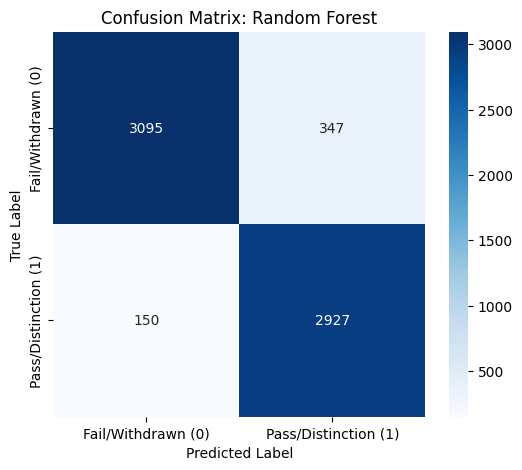

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Calculate Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix & Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = rec  # Recall is sensitivity

# Print Metrics
print(f"Random Forest Metrics:")
print(f"Accuracy:    {acc:.4f}")
print(f"Precision:   {prec:.4f}")
print(f"Recall:      {rec:.4f} (Sensitivity)")
print(f"F1-Score:    {f1:.4f}")
print(f"Specificity: {specificity:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Random Forest')
plt.show()

Decision Trees Metrics:
Accuracy:    0.8912
Precision:                 0.8955
Recall (Sensitivity):      0.8713
F1-Score:                  0.8832
Specificity:               0.9091


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3442
           1       0.90      0.87      0.88      3077

    accuracy                           0.89      6519
   macro avg       0.89      0.89      0.89      6519
weighted avg       0.89      0.89      0.89      6519



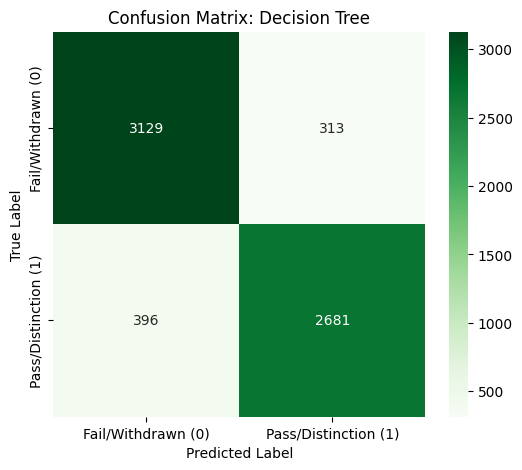

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Calculate Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Confusion Matrix & Specificity
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
specificity_dt = tn / (tn + fp)
sensitivity_dt = rec_dt

# Print Metrics
print(f"Decision Trees Metrics:")
print(f"Accuracy:    {acc_dt:.4f}")
print(f"Precision:                 {prec_dt:.4f}")
print(f"Recall (Sensitivity):      {rec_dt:.4f}")
print(f"F1-Score:                  {f1_dt:.4f}")
print(f"Specificity:               {specificity_dt:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

XGBoost Metrics:
Accuracy:                  0.9271
Precision:                 0.8988
Recall (Sensitivity):      0.9529
F1-Score:                  0.9251
Specificity:               0.9041


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3442
           1       0.90      0.95      0.93      3077

    accuracy                           0.93      6519
   macro avg       0.93      0.93      0.93      6519
weighted avg       0.93      0.93      0.93      6519



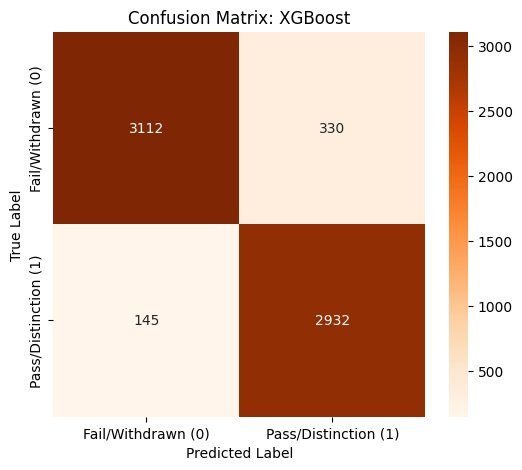

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Confusion Matrix & Specificity
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tn, fp, fn, tp = cm_xgb.ravel()
specificity_xgb = tn / (tn + fp)
sensitivity_xgb = rec_xgb

# Print Metrics
print(f"XGBoost Metrics:")
print(f"Accuracy:                  {acc_xgb:.4f}")
print(f"Precision:                 {prec_xgb:.4f}")
print(f"Recall (Sensitivity):      {rec_xgb:.4f}")
print(f"F1-Score:                  {f1_xgb:.4f}")
print(f"Specificity:               {specificity_xgb:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: XGBoost')
plt.show()

SVM (Linear) Metrics:
Accuracy:                  0.8957
Precision:                 0.8644
Recall (Sensitivity):      0.9240
F1-Score:                  0.8932
Specificity:               0.8704


              precision    recall  f1-score   support

           0       0.93      0.87      0.90      3442
           1       0.86      0.92      0.89      3077

    accuracy                           0.90      6519
   macro avg       0.90      0.90      0.90      6519
weighted avg       0.90      0.90      0.90      6519



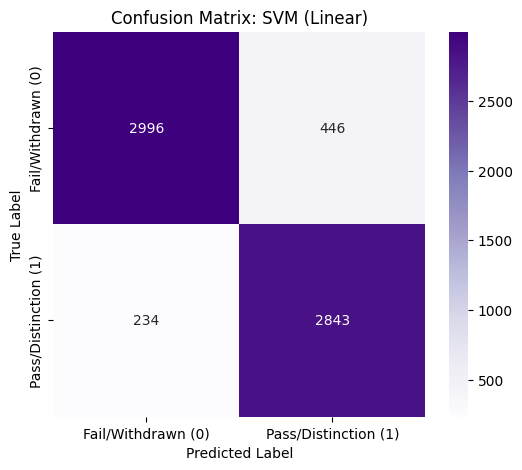

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train SVM (LinearSVC) with Scaling
# SVM requires feature scaling for optimal performance, unlike tree-based models
svm_model = make_pipeline(StandardScaler(), LinearSVC(random_state=42, dual=False))
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Calculate Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Confusion Matrix & Specificity
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
specificity_svm = tn / (tn + fp)
sensitivity_svm = rec_svm

# Print Metrics
print(f"SVM (Linear) Metrics:")
print(f"Accuracy:                  {acc_svm:.4f}")
print(f"Precision:                 {prec_svm:.4f}")
print(f"Recall (Sensitivity):      {rec_svm:.4f}")
print(f"F1-Score:                  {f1_svm:.4f}")
print(f"Specificity:               {specificity_svm:.4f}")
print("\n" + "="*30 + "\n")
print(classification_report(y_test, y_pred_svm))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: SVM (Linear)')
plt.show()

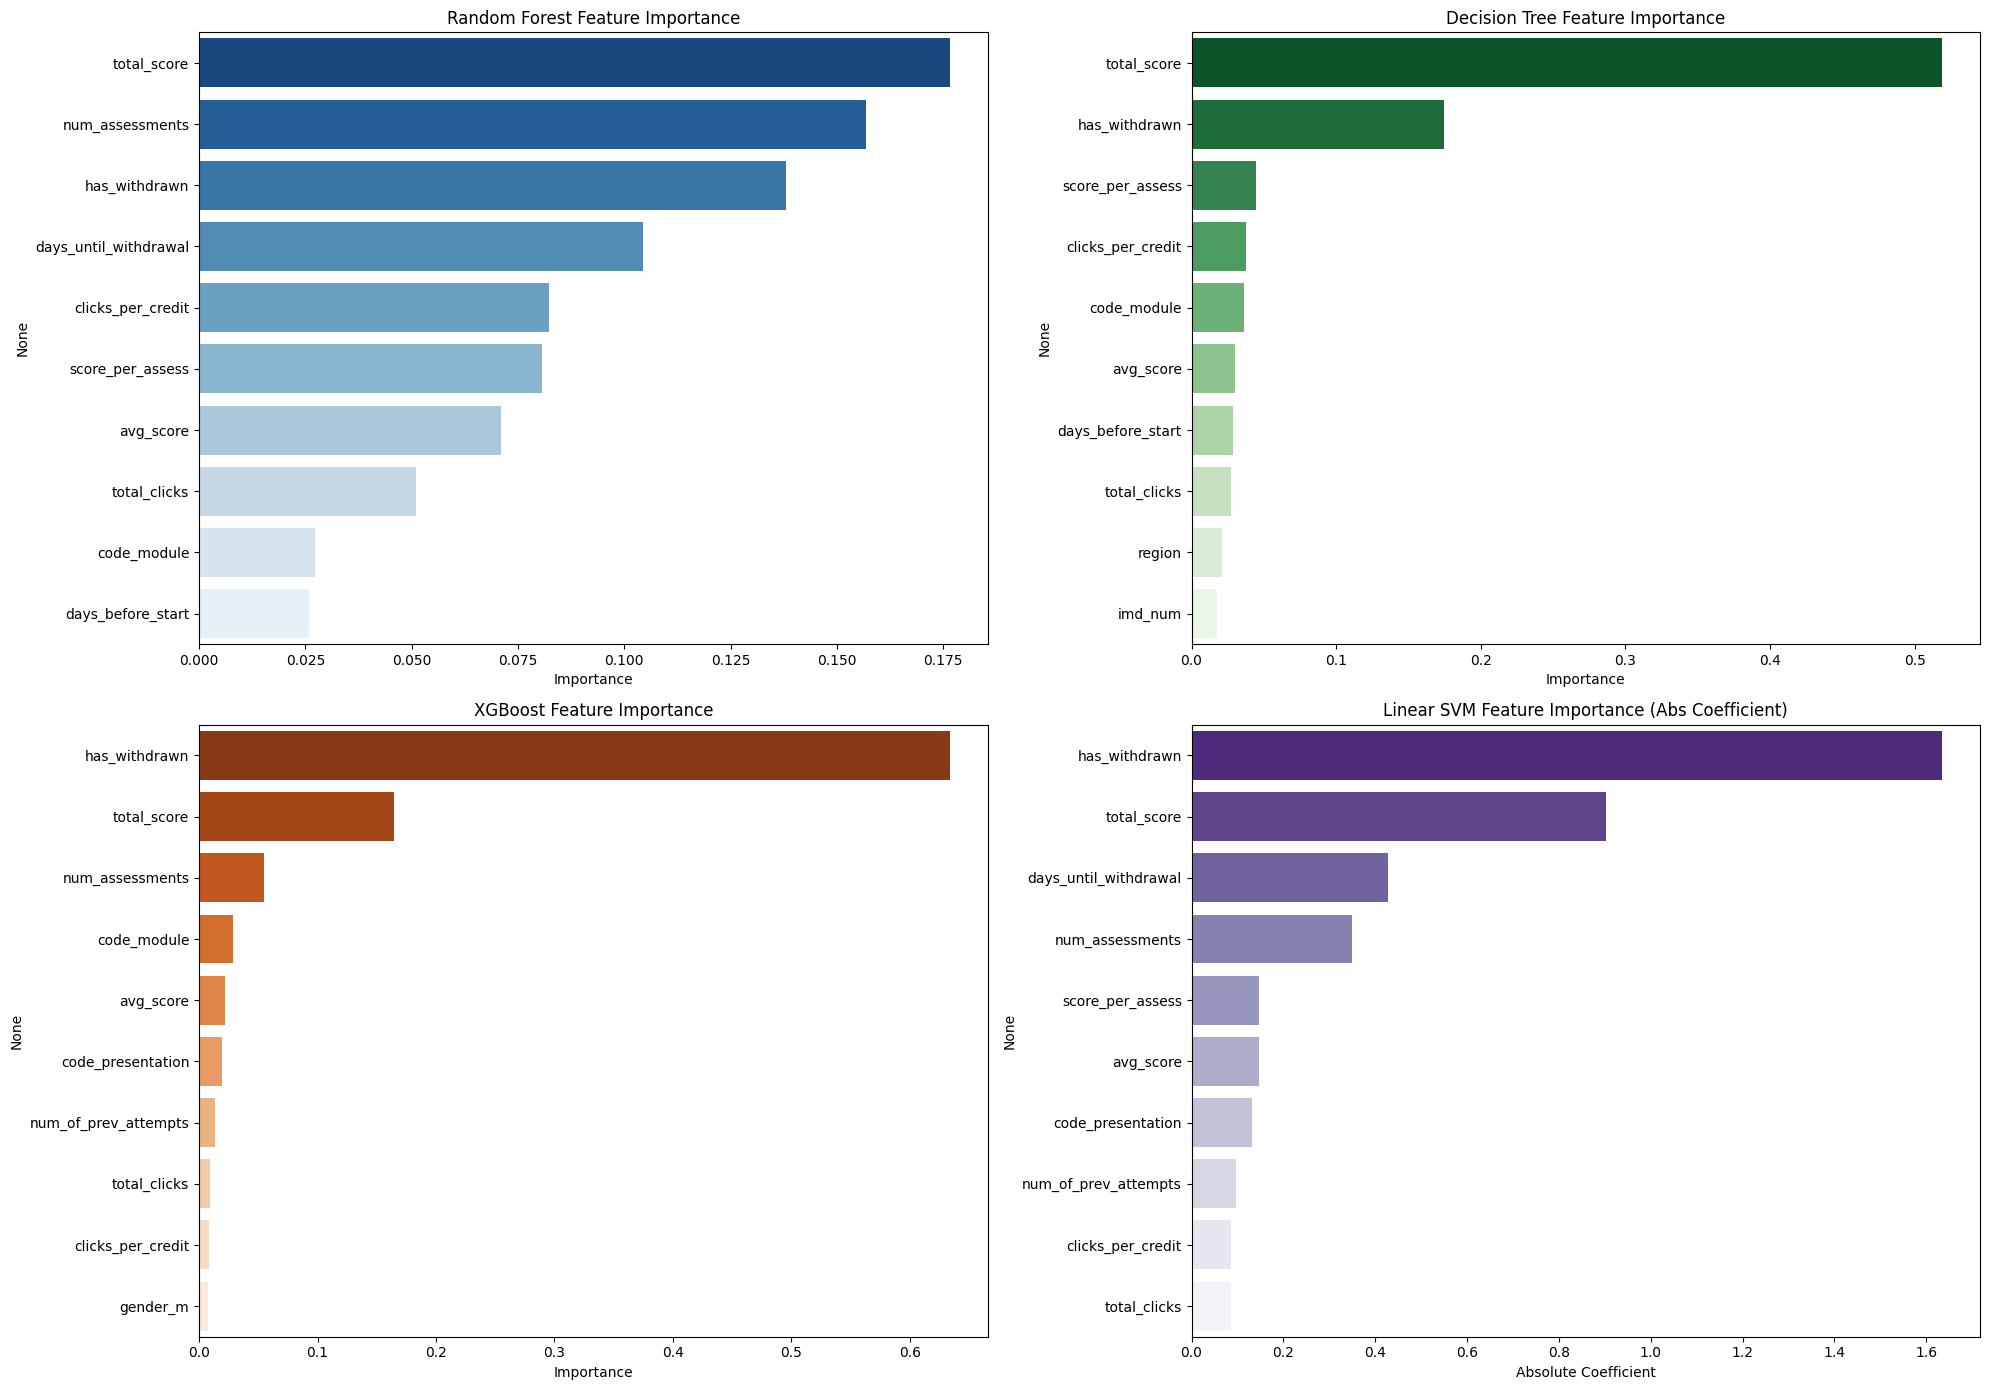

In [ ]:
feature_names = X_train.columns

# Helper function to get top features
def get_top_features(importances, names, top_n=10):
    indices = np.argsort(importances)[::-1][:top_n]
    return names[indices], importances[indices]

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

# 1. Random Forest
rf_importances = rf_model.feature_importances_
top_feat_rf, top_imp_rf = get_top_features(rf_importances, feature_names)
sns.barplot(x=top_imp_rf, y=top_feat_rf, ax=axes[0], palette='Blues_r')
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance')

# 2. Decision Tree
dt_importances = dt_model.feature_importances_
top_feat_dt, top_imp_dt = get_top_features(dt_importances, feature_names)
sns.barplot(x=top_imp_dt, y=top_feat_dt, ax=axes[1], palette='Greens_r')
axes[1].set_title('Decision Tree Feature Importance')
axes[1].set_xlabel('Importance')

# 3. XGBoost
xgb_importances = xgb_model.feature_importances_
top_feat_xgb, top_imp_xgb = get_top_features(xgb_importances, feature_names)
sns.barplot(x=top_imp_xgb, y=top_feat_xgb, ax=axes[2], palette='Oranges_r')
axes[2].set_title('XGBoost Feature Importance')
axes[2].set_xlabel('Importance')

# 4. Linear SVM (Coefficients)
# Accessing the LinearSVC step from the pipeline
svm_coef = np.abs(svm_model[-1].coef_[0]) # Taking absolute value for importance
top_feat_svm, top_imp_svm = get_top_features(svm_coef, feature_names)
sns.barplot(x=top_imp_svm, y=top_feat_svm, ax=axes[3], palette='Purples_r')
axes[3].set_title('Linear SVM Feature Importance (Abs Coefficient)')
axes[3].set_xlabel('Absolute Coefficient')

plt.tight_layout()
plt.show()

## Summary of 'MODEL SELECTION AND PERFORMANCE COMPARISON'

In the **MODEL SELECTION AND PERFORMANCE COMPARISON** section, we trained and evaluated several classification models to predict student outcomes (Pass/Distinction vs. Fail/Withdrawn). The main activities included:

1.  **Model Training**: We trained four different classification algorithms:
    *   **Random Forest Classifier**: A powerful ensemble method known for its robustness.
    *   **Decision Tree Classifier**: A fundamental tree-based model.
    *   **XGBoost Classifier**: A highly efficient and popular gradient boosting framework.
    *   **Support Vector Machine (LinearSVC)**: A linear classifier, used with `StandardScaler` to handle feature scaling.

2.  **Model Evaluation Metrics**: For each model, we calculated and reported key performance metrics on the test set (`X_test`, `y_test`):
    *   **Accuracy**: Overall correctness of the model.
    *   **Precision**: Proportion of true positive predictions among all positive predictions.
    *   **Recall (Sensitivity)**: Proportion of true positive predictions among all actual positives.
    *   **F1-Score**: Harmonic mean of precision and recall, providing a balanced measure.
    *   **Specificity**: Proportion of true negative predictions among all actual negatives.

3.  **Confusion Matrix Visualization**: For each model, a confusion matrix was plotted using a heatmap to visually represent the number of true positives, true negatives, false positives, and false negatives, offering a clear insight into the model's performance on each class.

4.  **Feature Importance Analysis**: We analyzed and visualized the top features influencing predictions for each model:
    *   For tree-based models (Random Forest, Decision Tree, XGBoost), feature importances were directly extracted and plotted.
    *   For the Linear SVM, the absolute coefficients were used to infer feature importance.

## HYPERPARAMETER TUNING AND CROSS VALIDATION FOR RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'max_features': ['sqrt']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9220297416565324


Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3442
           1       0.89      0.95      0.92      3077

    accuracy                           0.92      6519
   macro avg       0.92      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



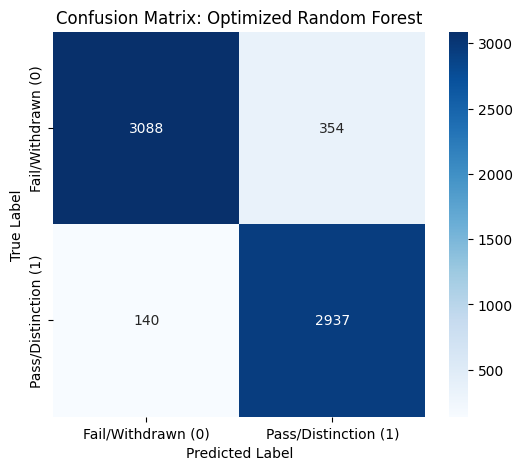


Performance Comparison (Baseline vs. Optimized):
Metric          Baseline   Optimized  Difference
--------------------------------------------------
Accuracy        0.9238     0.9242     +0.0005
Precision       0.8940     0.8924     -0.0016
Recall          0.9513     0.9545     +0.0032
F1-Score        0.9217     0.9224     +0.0007

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# 1. Retrieve the best estimator
best_rf = grid_search.best_estimator_

# 2. Predict on test set
y_pred_best = best_rf.predict(X_test)

# 3. Calculate Metrics
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# 4. Print Classification Report
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best))

# 5. Confusion Matrix Visualization
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Optimized Random Forest')
plt.show()

# 6. Compare with Baseline
print("\nPerformance Comparison (Baseline vs. Optimized):")
print(f"{'Metric':<15} {'Baseline':<10} {'Optimized':<10} {'Difference':<10}")
print("-"*50)
print(f"{'Accuracy':<15} {acc:.4f}     {acc_best:.4f}     {acc_best - acc:+.4f}")
print(f"{'Precision':<15} {prec:.4f}     {prec_best:.4f}     {prec_best - prec:+.4f}")
print(f"{'Recall':<15} {rec:.4f}     {rec_best:.4f}     {rec_best - rec:+.4f}")
print(f"{'F1-Score':<15} {f1:.4f}     {f1_best:.4f}     {f1_best - f1:+.4f}")

print("\nBest Hyperparameters:", grid_search.best_params_)

# HYPERPARAMETER TUNING AND CROSS VALIDATION FOR XGBOOST

In [ ]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
xgb_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters (XGBoost):", xgb_grid_search.best_params_)
print("Best Cross-Validation Score (XGBoost):", xgb_grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters (XGBoost): {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Score (XGBoost): 0.9251745810715283


Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3442
           1       0.90      0.96      0.93      3077

    accuracy                           0.93      6519
   macro avg       0.93      0.93      0.93      6519
weighted avg       0.93      0.93      0.93      6519



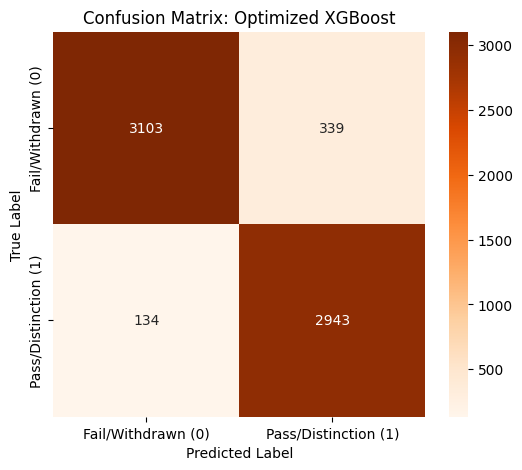

Optimized XGBoost Metrics:
Accuracy:    0.9274
Precision:   0.8967
Recall:      0.9565
F1-Score:    0.9256


In [ ]:
# 1. Retrieve the best estimator
best_xgb = xgb_grid_search.best_estimator_

# 2. Predict on test set
y_pred_best_xgb = best_xgb.predict(X_test)

# 3. Calculate Metrics
acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
prec_best_xgb = precision_score(y_test, y_pred_best_xgb)
rec_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)

# 4. Print Classification Report
print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))

# 5. Confusion Matrix Visualization
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Optimized XGBoost')
plt.show()

# Print Summary Metrics
print(f"Optimized XGBoost Metrics:")
print(f"Accuracy:    {acc_best_xgb:.4f}")
print(f"Precision:   {prec_best_xgb:.4f}")
print(f"Recall:      {rec_best_xgb:.4f}")
print(f"F1-Score:    {f1_best_xgb:.4f}")

# HYPERPARAMETER TUNING AND CROSS VALIDATION FOR DECISION TREES

In [ ]:
# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
dt_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters (Decision Tree):", dt_grid_search.best_params_)
print("Best Cross-Validation Score (Decision Tree):", dt_grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score (Decision Tree): 0.9129784486472007


Optimized Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3442
           1       0.88      0.95      0.91      3077

    accuracy                           0.91      6519
   macro avg       0.91      0.91      0.91      6519
weighted avg       0.91      0.91      0.91      6519



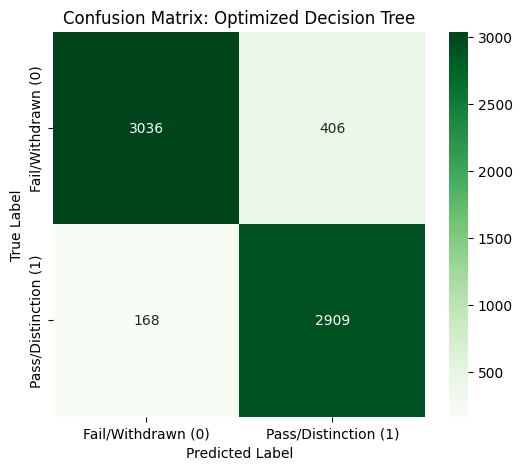

Optimized Decision Tree Metrics:
Accuracy:    0.9119
Precision:   0.8775
Recall:      0.9454
F1-Score:    0.9102


In [ ]:
# 1. Retrieve the best estimator
best_dt = dt_grid_search.best_estimator_

# 2. Predict on test set
y_pred_best_dt = best_dt.predict(X_test)

# 3. Calculate Metrics
acc_best_dt = accuracy_score(y_test, y_pred_best_dt)
prec_best_dt = precision_score(y_test, y_pred_best_dt)
rec_best_dt = recall_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)

# 4. Print Classification Report
print("Optimized Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_best_dt))

# 5. Confusion Matrix Visualization
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Optimized Decision Tree')
plt.show()

# 6. Print Summary Metrics
print(f"Optimized Decision Tree Metrics:")
print(f"Accuracy:    {acc_best_dt:.4f}")
print(f"Precision:   {prec_best_dt:.4f}")
print(f"Recall:      {rec_best_dt:.4f}")
print(f"F1-Score:    {f1_best_dt:.4f}")

# HYPERPARAMETER TUNING AND CROSS VALIDATION FOR SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and SVC
# Standardizing features is crucial for SVM performance
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

# Define a focused parameter grid to keep training time reasonable
# Note: SVC training time can be high for large datasets, so we limit the grid size
svm_param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale']
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
print("Starting SVM Hyperparameter Tuning... This may take a while.")
svm_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters (SVM):", svm_grid_search.best_params_)
print("Best Cross-Validation Score (SVM):", svm_grid_search.best_score_)

Starting SVM Hyperparameter Tuning... This may take a while.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters (SVM): {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best Cross-Validation Score (SVM): 0.9102938907643093


Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3442
           1       0.87      0.95      0.91      3077

    accuracy                           0.91      6519
   macro avg       0.91      0.91      0.91      6519
weighted avg       0.92      0.91      0.91      6519



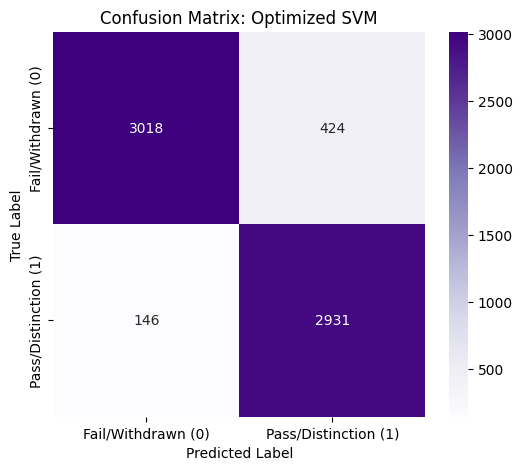


Performance Comparison (Baseline SVM vs. Optimized SVM):
Metric          Baseline   Optimized  Difference
--------------------------------------------------
Accuracy        0.8957     0.9126     +0.0169
Precision       0.8644     0.8736     +0.0092
Recall          0.9240     0.9526     +0.0286
F1-Score        0.8932     0.9114     +0.0182

Best Hyperparameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [ ]:
# 1. Retrieve the best estimator
best_svm = svm_grid_search.best_estimator_

# 2. Predict on test set
y_pred_best_svm = best_svm.predict(X_test)

# 3. Calculate Metrics
acc_best_svm = accuracy_score(y_test, y_pred_best_svm)
prec_best_svm = precision_score(y_test, y_pred_best_svm)
rec_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)

# 4. Print Classification Report
print("Optimized SVM Classification Report:")
print(classification_report(y_test, y_pred_best_svm))

# 5. Confusion Matrix Visualization
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'],
            yticklabels=['Fail/Withdrawn (0)', 'Pass/Distinction (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Optimized SVM')
plt.show()

# 6. Compare with Baseline
print("\nPerformance Comparison (Baseline SVM vs. Optimized SVM):")
print(f"{'Metric':<15} {'Baseline':<10} {'Optimized':<10} {'Difference':<10}")
print("-"*50)
print(f"{'Accuracy':<15} {acc_svm:.4f}     {acc_best_svm:.4f}     {acc_best_svm - acc_svm:+.4f}")
print(f"{'Precision':<15} {prec_svm:.4f}     {prec_best_svm:.4f}     {prec_best_svm - prec_svm:+.4f}")
print(f"{'Recall':<15} {rec_svm:.4f}     {rec_best_svm:.4f}     {rec_best_svm - rec_svm:+.4f}")
print(f"{'F1-Score':<15} {f1_svm:.4f}     {f1_best_svm:.4f}     {f1_best_svm - f1_svm:+.4f}")

print("\nBest Hyperparameters:", svm_grid_search.best_params_)

## PERFORMANCE SUMMARY

In [ ]:
# Create a dictionary of results
results_data = [
    # Random Forest
    {'Algorithm': 'Random Forest', 'Type': 'Baseline', 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1},
    {'Algorithm': 'Random Forest', 'Type': 'Optimized', 'Accuracy': acc_best, 'Precision': prec_best, 'Recall': rec_best, 'F1-Score': f1_best},

    # Decision Tree
    {'Algorithm': 'Decision Tree', 'Type': 'Baseline', 'Accuracy': acc_dt, 'Precision': prec_dt, 'Recall': rec_dt, 'F1-Score': f1_dt},
    {'Algorithm': 'Decision Tree', 'Type': 'Optimized', 'Accuracy': acc_best_dt, 'Precision': prec_best_dt, 'Recall': rec_best_dt, 'F1-Score': f1_best_dt},

    # XGBoost
    {'Algorithm': 'XGBoost', 'Type': 'Baseline', 'Accuracy': acc_xgb, 'Precision': prec_xgb, 'Recall': rec_xgb, 'F1-Score': f1_xgb},
    {'Algorithm': 'XGBoost', 'Type': 'Optimized', 'Accuracy': acc_best_xgb, 'Precision': prec_best_xgb, 'Recall': rec_best_xgb, 'F1-Score': f1_best_xgb},

    # SVM
    {'Algorithm': 'SVM', 'Type': 'Baseline', 'Accuracy': acc_svm, 'Precision': prec_svm, 'Recall': rec_svm, 'F1-Score': f1_svm},
    {'Algorithm': 'SVM', 'Type': 'Optimized', 'Accuracy': acc_best_svm, 'Precision': prec_best_svm, 'Recall': rec_best_svm, 'F1-Score': f1_best_svm}
]

# Create DataFrame
performance_df = pd.DataFrame(results_data)

# Display the DataFrame
display(performance_df)

,Algorithm,Type,Accuracy,Precision,Recall,F1-Score
0,Random Forest,Baseline,0.923761,0.894013,0.951251,0.921745
1,Random Forest,Optimized,0.924222,0.892434,0.954501,0.922425
2,Decision Tree,Baseline,0.891241,0.895458,0.871303,0.883215
3,Decision Tree,Optimized,0.911950,0.877526,0.945401,0.910200
4,XGBoost,Baseline,0.927136,0.898835,0.952876,0.925067
5,XGBoost,Optimized,0.927443,0.896709,0.956451,0.925617
6,SVM,Baseline,0.895690,0.864396,0.923952,0.893183
7,SVM,Optimized,0.912563,0.873621,0.952551,0.911381


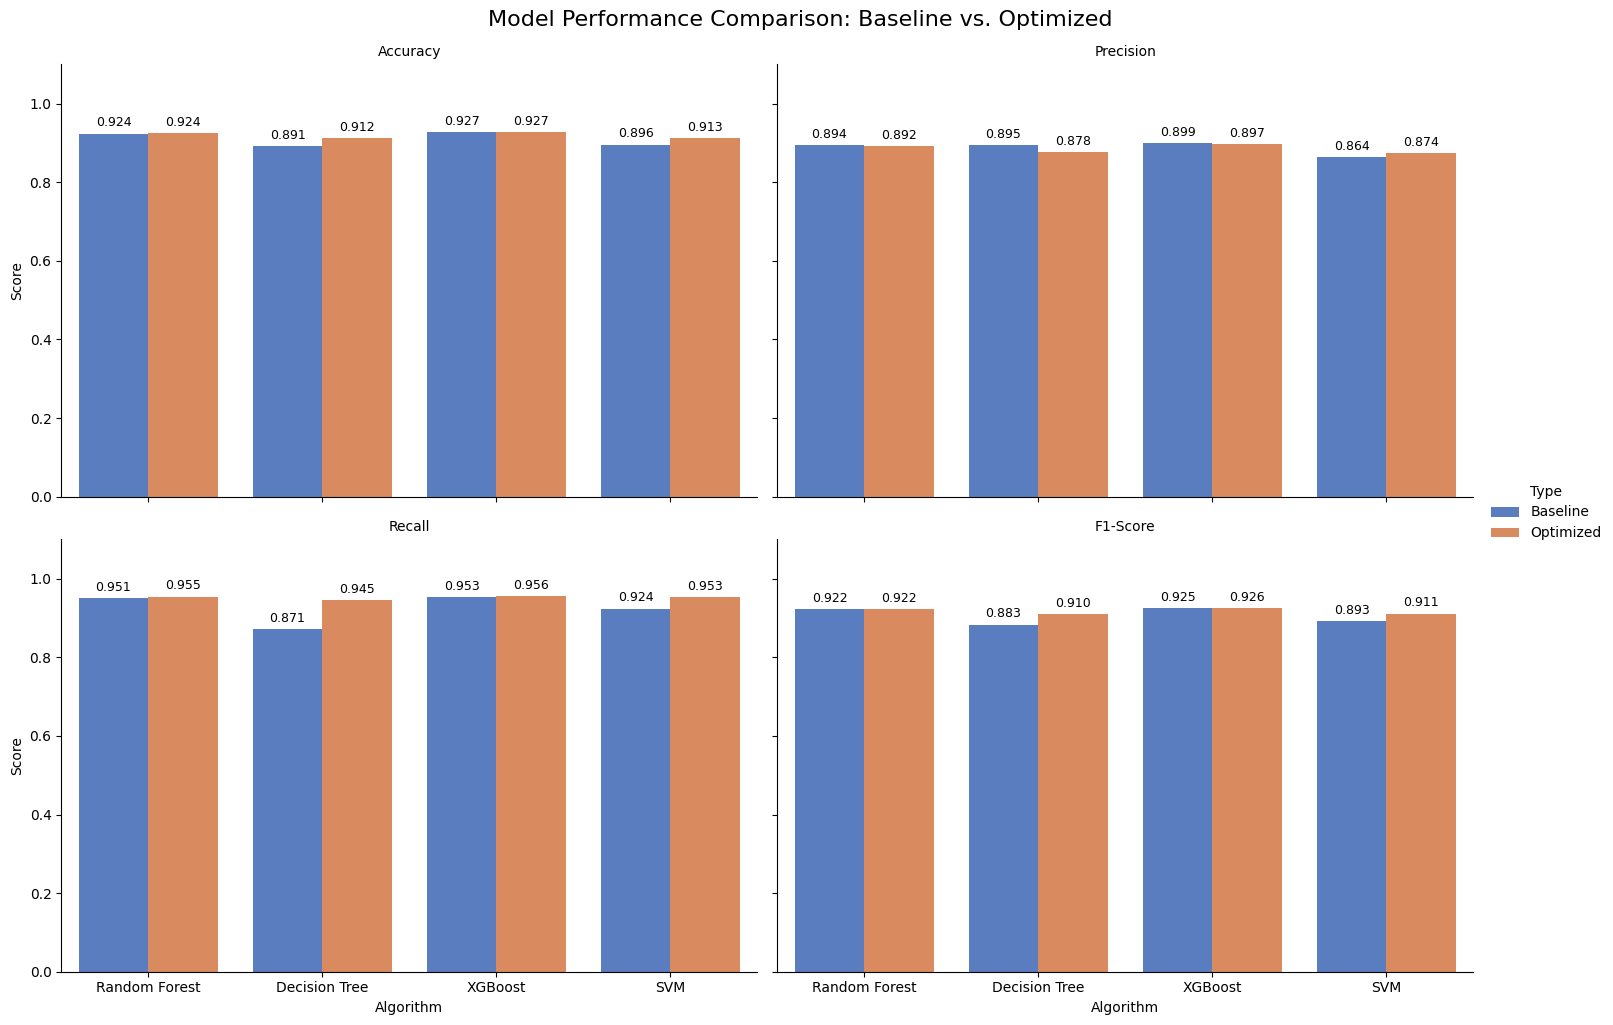


CONCLUSION:
Based on the F1-Score (balance of precision and recall), the best performing model overall is:
-> XGBoost (Optimized)
   - F1-Score: 0.9256
   - Accuracy: 0.9274
   - Recall:   0.9565
   - Precision: 0.8967


In [ ]:
# Melt the DataFrame for easier plotting with seaborn
performance_melted = performance_df.melt(id_vars=['Algorithm', 'Type'],
                                         var_name='Metric',
                                         value_name='Score')

# Initialize the figure using catplot for faceted bar charts
g = sns.catplot(
    data=performance_melted,
    kind="bar",
    x="Algorithm",
    y="Score",
    hue="Type",
    col="Metric",
    col_wrap=2,
    height=5,
    aspect=1.5,
    palette="muted"
)

# Adjust titles and layout
g.fig.suptitle('Model Performance Comparison: Baseline vs. Optimized', y=1.02, fontsize=16)
g.set_axis_labels("Algorithm", "Score")
g.set_titles("{col_name}")

# Show values on bars for better readability
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3, size=9)
    # Set y-axis limit slightly higher to accommodate labels
    ax.set_ylim(0, 1.1)

plt.show()

# Identify and print the best model based on F1-Score
best_model_row = performance_df.loc[performance_df['F1-Score'].idxmax()]
print("\nCONCLUSION:")
print(f"Based on the F1-Score (balance of precision and recall), the best performing model overall is:")
print(f"-> {best_model_row['Algorithm']} ({best_model_row['Type']})")
print(f"   - F1-Score: {best_model_row['F1-Score']:.4f}")
print(f"   - Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"   - Recall:   {best_model_row['Recall']:.4f}")
print(f"   - Precision: {best_model_row['Precision']:.4f}")

# MODEL PERFORMANCE PLOTS

In [ ]:
# 1. Random Forest Probabilities
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# 2. Decision Tree Probabilities
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# 3. XGBoost Probabilities
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# 4. SVM Decision Function (Scores)
# Using decision_function because probability=True might not be set or is expensive for SVM
y_score_svm = best_svm.decision_function(X_test)

print("Prediction scores computed successfully for all optimized models.")

Prediction scores computed successfully for all optimized models.


## ROC-AUC PLOT

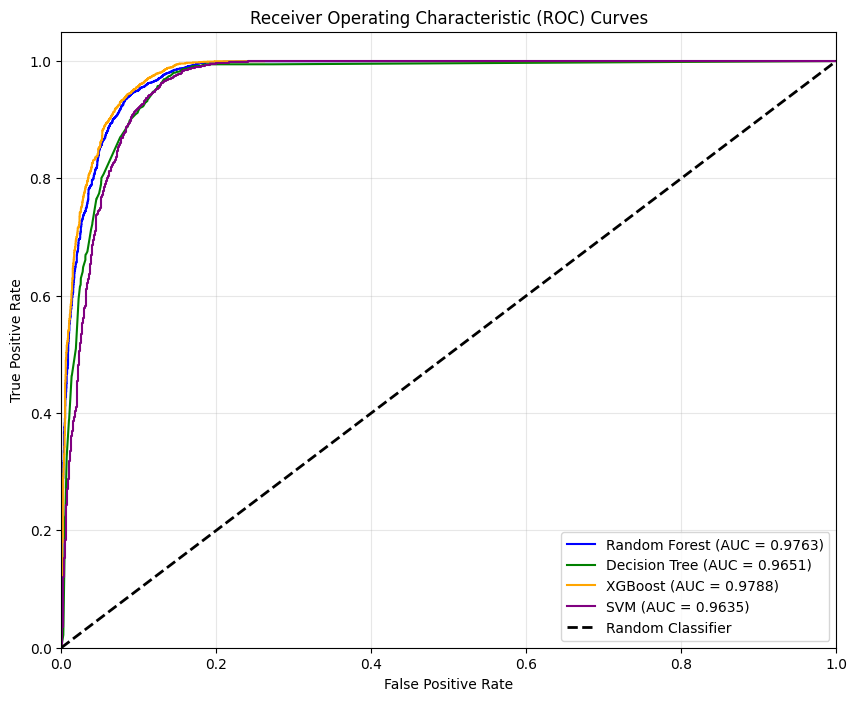

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC metrics for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='orange')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.4f})', color='purple')

# Plot Random Classifier diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## PRECISION-RECALL PLOT

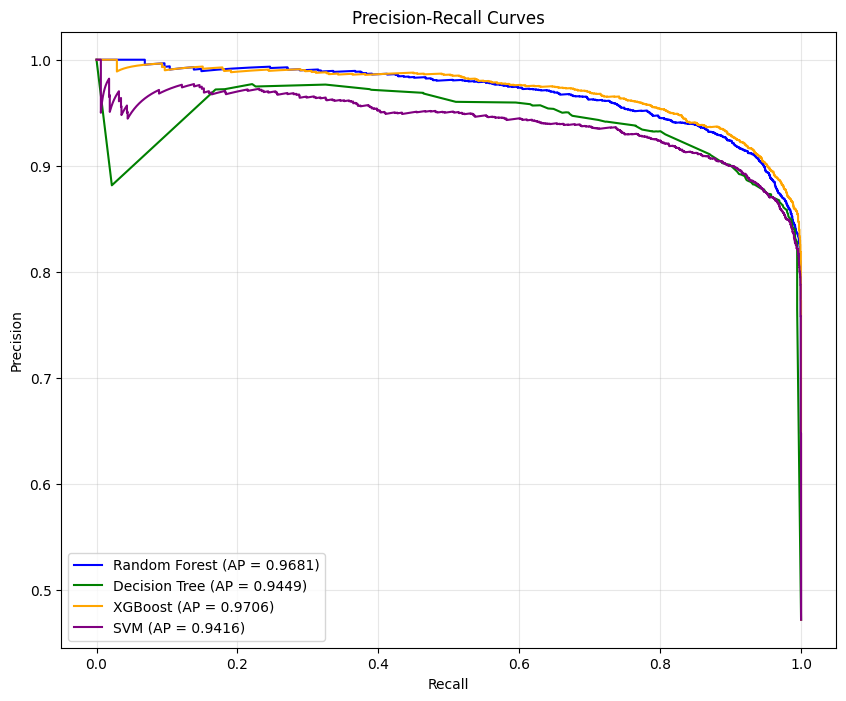

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall metrics for each model
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)
ap_rf = average_precision_score(y_test, y_prob_rf)

prec_dt, rec_dt, _ = precision_recall_curve(y_test, y_prob_dt)
ap_dt = average_precision_score(y_test, y_prob_dt)

prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)
ap_xgb = average_precision_score(y_test, y_prob_xgb)

prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_score_svm)
ap_svm = average_precision_score(y_test, y_score_svm)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(rec_rf, prec_rf, label=f'Random Forest (AP = {ap_rf:.4f})', color='blue')
plt.plot(rec_dt, prec_dt, label=f'Decision Tree (AP = {ap_dt:.4f})', color='green')
plt.plot(rec_xgb, prec_xgb, label=f'XGBoost (AP = {ap_xgb:.4f})', color='orange')
plt.plot(rec_svm, prec_svm, label=f'SVM (AP = {ap_svm:.4f})', color='purple')

# Formatting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

## Summary of 'HYPERPARAMETER TUNING AND MODEL PERFORMANCE ANALYSIS'

In this comprehensive section, we focused on refining our classification models, evaluating their performance rigorously, and identifying the optimal model for predicting student outcomes. The activities performed were:

### Hyperparameter Tuning and Cross-Validation
For each of the selected classification models (Random Forest, XGBoost, Decision Trees, and SVM), we performed hyperparameter tuning using `GridSearchCV`. This systematic approach involved:
*   **Defining Parameter Grids**: For each model, a specific `param_grid` was established, outlining a range of hyperparameters to be tested (e.g., `n_estimators`, `max_depth`, `min_samples_split` for tree-based models; `C`, `kernel`, `gamma` for SVM).
*   **Cross-Validation Strategy**: A 3-fold cross-validation (`cv=3`) was applied to ensure the robustness of the hyperparameter selection and prevent overfitting to a single train-validation split.
*   **Scoring Metric**: 'Accuracy' was chosen as the primary scoring metric for `GridSearchCV` to guide the selection of the best hyperparameter combination.
*   **Best Parameters and Scores**: After fitting `GridSearchCV` to the training data, the best set of hyperparameters and the corresponding best cross-validation score were identified for each model.
*   **Evaluation of Optimized Models**: The `best_estimator_` obtained from `GridSearchCV` for each model was then used to make predictions on the unseen `X_test` data. Performance was evaluated using a suite of metrics: Accuracy, Precision, Recall, and F1-Score. These optimized models' performances were then explicitly compared against their baseline, untuned counterparts, highlighting any improvements achieved through tuning.

### Model Performance Plots
To provide a deeper insight into the models' capabilities and trade-offs, we generated two critical performance visualization plots:
*   **ROC-AUC Curves**: Receiver Operating Characteristic (ROC) curves were plotted for all optimized models. These curves illustrate the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate at various classification thresholds. The Area Under the Curve (AUC) score was calculated for each model, providing a single aggregate measure of performance across all possible classification thresholds. A higher AUC indicates better discriminatory power.
*   **Precision-Recall Curves**: Precision-Recall (PR) curves were also generated, which are particularly informative for imbalanced datasets, as they focus on the performance of the positive class. These curves plot Precision against Recall at various thresholds. The Average Precision (AP) score was calculated for each model, summarizing the PR curve and indicating the model's ability to retrieve positive instances while maintaining a high precision.

### Overall Performance Summary
To consolidate and compare the results effectively, a `performance_df` DataFrame was created, summarizing the Accuracy, Precision, Recall, and F1-Score for both the baseline and optimized versions of all four models. This DataFrame was then visually presented using a `catplot` with multiple facets, allowing for an easy, side-by-side comparison of each metric across different models and tuning stages. This visualization helped in understanding which models benefited most from tuning and how they performed relative to each other.

**Conclusion on Best Model**: Based on the comprehensive evaluation, particularly focusing on the F1-Score (which balances Precision and Recall), the **Optimized XGBoost** model emerged as the best-performing model, demonstrating superior overall performance in predicting student outcomes.